In [ ]:
### My design (Pandas)

In [4]:
import json
import collections
import os
import pandas as pd # just added
from pandas import DataFrame
import numpy as np
from collections import OrderedDict
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib

# makes plots show up in notebook instead of in new window
%matplotlib inline

In [5]:
#A function that returns the Gini index of a dictionary of the form
#{item: frequency}
def getGini(DictIn):
    tags_list = DictIn.keys() 
    #I _think_ this should be equivalent to DictIn.values(), 
    # but doing this just to be safe
    tags_freq_list = [DictIn[tag] for tag in tags_list]


    denominator = 2*len(tags_list) * sum(tags_freq_list)
    numerator = 0
    for freq1 in tags_freq_list:
        for freq2 in tags_freq_list:
            numerator += abs(freq1 - freq2)

    Gini = float(numerator)/denominator
    return Gini


In [6]:

AtlasList=['Democrat_Atlas.txt'
           #,'Republican_Atlas.txt'
          ]

    
#'domain_URL_hashtag_Democrats_2015-03-06.txt','Domain_URL_hashtag_Democrats_2015-03-07.txt','Domain_URL_hashtag_Democrats_2015-03-08.txt','Domain_URL_hashtag_Democrats_2015-03-09.txt','Domain_URL_hashtag_Democrats_2015-03-10.txt','Domain_URL_hashtag_Democrats_2015-03-11.txt','Domain_URL_hashtag_Democrats_2015-03-12.txt',
#'Domain_URL_hashtag_Democrats_2016-06-23.txt','Domain_URL_hashtag_Democrats_2016-06-24.txt','Domain_URL_hashtag_Democrats_2016-06-25.txt','Domain_URL_hashtag_Democrats_2016-06-26.txt','Domain_URL_hashtag_Democrats_2016-06-27.txt','Domain_URL_hashtag_Democrats_2016-06-28.txt'    
 
#'domain_URL_hashtag_Republicans_2015-03-06.txt','Domain_URL_hashtag_Republicans_2015-03-07.txt','Domain_URL_hashtag_Republicans_2015-03-08.txt','Domain_URL_hashtag_Republicans_2015-03-09.txt','Domain_URL_hashtag_Republicans_2015-03-10.txt','Domain_URL_hashtag_Republicans_2015-03-11.txt','Domain_URL_hashtag_Republicans_2015-03-12.txt',
#'Domain_URL_hashtag_Republicans_2016-06-23.txt','Domain_URL_hashtag_Republicans_2016-06-24.txt','Domain_URL_hashtag_Republicans_2016-06-25.txt','Domain_URL_hashtag_Republicans_2016-06-26.txt','Domain_URL_hashtag_Republicans_2016-06-27.txt','Domain_URL_hashtag_Republicans_2016-06-28.txt' 

           
path_in_Dem ="/Users/julesottino-loffler/Documents/domain_Democrats/"
path_in_Rep ="/Users/julesottino-loffler/Documents/domain_Republicans/"

guiding_path ="/Users/julesottino-loffler/Documents/domain_intro/"

#for filename in os.listdir(os.getcwd()):

#Go over Dems or Republicans
Atlas =  'Democrat_Atlas.txt'
path_in = path_in_Dem
output_name = 'Dem'


#Atlas =  'Republican_Atlas.txt'
#path_in = path_in_Rep
#output_name = 'Rep'

Ads_tags_list=  ['weareperfectday2', 'chongoperu4no', 'limite1gh16', 'sabesquetequierecuando', 'harmonizersaretired', 'nedtsj', 'ad200', 'afazendaabre']


In [ ]:
#Ideally, we shouldn't ever need to run this cell in order to run the lower cells

#POINT OF ADVICE: Control+/ to comment or uncomment a line
#                 Tab works on multiple selected lines, and shift+Tab un-tabs things


#Go over Dems or Republicans
Atlas =  'Democrat_Atlas.txt'
path_in = path_in_Dem
output_name = 'Dem'


#Atlas =  'Republican_Atlas.txt'
#path_in = path_in_Rep
#output_name = 'Rep'

total_url_dictionary = {}
total_url_list = []
total_hashtag_count_dictionary = {}
# total_hashtag_count_list = []

date_list = []      #list of starts of weeks
all_tweets = []

    
#Open up a file that describes all the files with the daily data
with open(guiding_path + Atlas,'r') as infile:
    for line in iter(infile): #each line corresponds to one week, so we go week by week
            FileList=line.split(",")


            #an empty dictionary of lists, keys are urls, values are a list of all hashtags
            #{url : [tag1, tag2, etc.]}
            #urls_and_tags = collections.defaultdict(list) 
            
            
            #An empty dictionary where the keys are the urls, and the valuekeep track of 
            #   the tags associated with the url and how many times they are used.  So it looks like
            #   {URL1 : {tag1: how many times it shows up, tag2: how often this shows up, ...}, URL2 :{...}, ...}
            #   So urls_and_tags["http://thehill.com/"] gives a dictionary of the tags associated with 
            #   TheHill.com, with values corresponding to their frequency
            urls_and_tags = {} 
            

            url_dictionary = {} #{Url : number of times it appears}
            url_list=[]         #List of urls
            total_hashtag_count_list=[] # just added list of all hashtags
            
            
            start_of_week = True #used for pulling out first date in week

            #open up each day's specific file
            for xitem in FileList:
                #Some scrubbing on the filename to make it openable
                xitem = xitem.strip()
                xitem = xitem[1:-1]
                
                if start_of_week:
                    #date=xitem[29:-4] #pulling out the date (Dem)
                    date=xitem[31:-4] #pulling out the date (Rep)
                    date_list.append(date)
                    start_of_week = False #we don't need other dates ub weejs
            
                #scrubbing out the wanted information
                with open(path_in +str(xitem),'r') as infile:
                    #each line corresponds to a single tweet
                    for line in iter(infile):
                        #each tweet is written as:
                        # [Dont care] || urls || [Don't care] || hastags seperated by commas
                        split_line=line.split("||")
                        
                        
                        #sanity check
                        if len(split_line) != 5: 
                            print("Line has more or less than 4 items")

                            
                        url = split_line[1] #get url
                        url = url.replace(" ","") #remove trailing whitespace
                        
                        #removing some unneeded surrounding bits
                        if url[:8] ==  'https://':
                            url = url[8:]
                        if url[:7] == 'http://':
                            url = url[7:]
                        if url[:4] == 'www.':
                            url = url[4:]
                        if url[-1] == '/':
                            url = url[:-1]
                        
                        #RECORDING URL FREQUENCY
                        if url in url_list: #if we have seen this url before, we add tally it
                            url_dictionary[url] += 1
                        else:    # if this is the first time we have seen it, we make a new entry
                            url_dictionary[url] = 1
                            url_list.append(url) #we record having seen it
                            urls_and_tags[url] = {} # we set up the second dictionary too
                            
                            
                            
                            
                        #RECORDING TAG FREQUENCY
                        hashtags_list = split_line[3].split(",") #get list of hastags in tweet
                        #adding all the hastags to the urlHash dictionary
                        new_list =[]
                        for tag in hashtags_list: 
                            tag = tag.replace(" ","") #removing whitespace
                            new_list.append(tag)
                            #Just added as attempt to make total hashtag collection 
                            Indiv_hashtag = tag                         
                            if Indiv_hashtag  in total_hashtag_count_list: #just added
                                total_hashtag_count_dictionary[Indiv_hashtag] += 1
                            else:
                                total_hashtag_count_dictionary[Indiv_hashtag] = 1
                                total_hashtag_count_list.append(Indiv_hashtag) #we record having seen it
                            #End of Just added portion
                        
                            
        
                            current_dict = urls_and_tags[url]  #the current recorded frequencies for tags associated with this url!!!
                            if tag in current_dict.keys(): #have we seen this tag before?
                                current_dict[tag] +=  1 # if we have, increment by 1
                                
                            else:
                                current_dict[tag] = 1 #otherwise, make a new entry
                            
                            urls_and_tags[url] = current_dict #update the main dictionary
                        all_tweets.append(new_list)

                            
                        #RECORDING TOTAL URL FREQUENCY (ACROSS ALL WEEKS)
                        if url in total_url_list: #if we have seen this url before, we add tally it
                            total_url_dictionary[url] += 1
                        else:    # if this is the first time we have seen it, we make a new entry
                            total_url_dictionary[url] = 1
                            total_url_list.append(url) #we record having seen it
       
                                

            #At this point, all the information we want is in one of two places:  
            # url_dictionary lists how often each url shows up
            # urls_and_tags contains the tag frequency for each url
            
            #To make other things faster, we record both url_dictionary and
            # urls_and_tags in order to make things faster later
            
            np.save('urlFreq' + output_name + date + '.npy', url_dictionary)
            np.save('HashFreq' + output_name + date + '.npy', total_hashtag_count_dictionary)
            np.save('urlTags' + output_name + date + '.npy', urls_and_tags)
            

            print "week starting in " + date + " complete."
            
            
#when everthing is done, we also save total_url_dictionary            
np.save('urlFreq' + output_name + 'Total' + '.npy', total_url_dictionary)
np.save('date_list' + '.npy', date_list)            
            
print "Compliation complete"
     




week starting in 15-03-06 complete.
week starting in 15-03-13 complete.


['2015-03-06' '2015-03-13' '2015-03-20' '2015-03-27' '2015-04-03'
 '2015-04-10' '2015-04-17' '2015-04-24' '2015-05-01' '2015-05-08'
 '2015-05-15' '2015-05-22' '2015-05-29' '2015-06-05' '2015-06-12'
 '2015-06-19' '2015-06-26' '2015-07-03' '2015-07-10' '2015-07-17'
 '2015-07-24' '2015-07-31' '2015-08-07' '2015-08-14' '2015-08-21'
 '2015-08-28' '2015-09-04' '2015-09-11' '2015-09-18' '2015-09-25'
 '2015-10-02' '2015-10-09' '2015-10-16' '2015-10-23' '2015-10-30'
 '2015-11-06' '2015-11-13' '2015-11-20' '2015-11-27' '2015-12-04'
 '2015-12-11' '2015-12-18' '2015-12-25' '2016-01-01' '2016-01-08'
 '2016-01-15' '2016-01-22' '2016-01-29' '2016-02-05' '2016-02-12'
 '2016-02-19' '2016-02-26' '2016-03-04' '2016-03-11' '2016-03-18'
 '2016-03-25' '2016-04-01' '2016-04-08' '2016-04-15' '2016-04-22'
 '2016-04-29' '2016-05-06' '2016-05-13' '2016-05-20' '2016-05-27'
 '2016-06-02' '2016-06-09' '2016-06-16' '2016-06-23']
['youtube.com', 'breitbart.com', 'PatriotJournalist.com', 'infidellivesmatter.blogspot.c

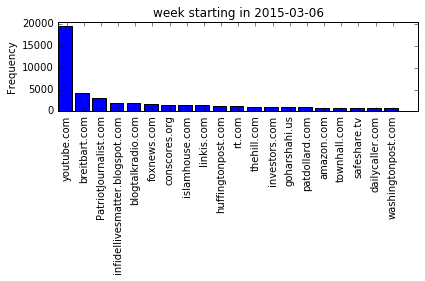

[0.9554544694347374, 0.8755096725445132, 0.9213520749665328, 0.0, 0.9227814439082045, 0.8341714736723866, 0.8483370945689953, 0.8483311834608612, 0.7645137877329248, 0.8714682365345752, 0.8571138317270123, 0.8139727006360323, 0.800356394129979, 0.6150730213780584, 0.8302731231033118, 0.8424787458843186, 0.7996311200536552, 0.7751785153401194, 0.8175148095413877, 0.7972296418672986]


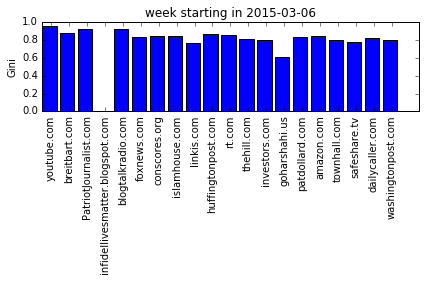

['farsi.khamenei.ir', 'youtube.com', 'PatriotJournalist.com', 'breitbart.com', 'vimeo.com', 'liveleak.com', 'foxnews.com', 'conscores.org', 'linkis.com', 'islamhouse.com', 'dailycaller.com', 'thehill.com', 'patdollard.com', 'twitlonger.com', 'investors.com', 'safeshare.tv', 'amazon.com', 'rt.com', 'goharshahi.us', 'facebook.com']
[14516, 8940, 6400, 3533, 2081, 1994, 1813, 1602, 1245, 1116, 1091, 1040, 1019, 927, 871, 835, 802, 789, 744, 688]
['tcot', 'isis', 'pjnet', 'islam', 'letter4u', 'letter4all', 'p2', 'sion', 'news', 'nbc', 'quran', 'edl', 'muslim', 'obama', 'rt', 'foxnews', 'teaparty', 'israel', 'ccot', '2a']
[40404, 23511, 18195, 15356, 14964, 14704, 11238, 8482, 7552, 7438, 6961, 6207, 5700, 5214, 5139, 5010, 4959, 4821, 4817, 4701]


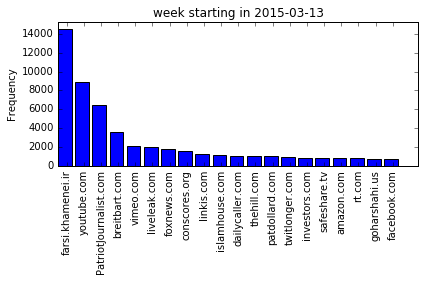

[0.28965426428451035, 0.9232086773129359, 0.9480382505976656, 0.8772848082262363, 0.7886036305605426, 0.8661152502766681, 0.8530919569719071, 0.8344083196311427, 0.7592139175257732, 0.7808925421873318, 0.8454407294832826, 0.8558954389653463, 0.838644456064341, 0.7406319177443784, 0.7985077022853216, 0.780155334151992, 0.8239324689151679, 0.8360388057662089, 0.4085011521891594, 0.6421534130893737]


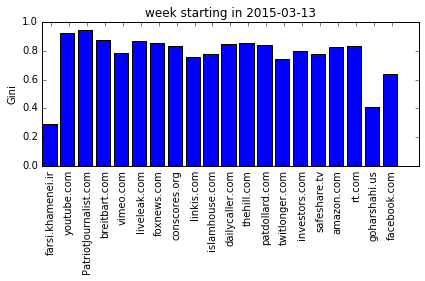

['farsi.khamenei.ir', 'youtube.com', 'PatriotJournalist.com', 'breitbart.com', 'faithfreedom.org', 'islamhouse.com', 'foxnews.com', 'linkis.com', 'twitlonger.com', 'conscores.org', 'blogtalkradio.com', 'facebook.com', 'freevocabulary.com', 'huffingtonpost.com', 'amazon.com', 'thehill.com', 'patdollard.com', 'dailycaller.com', 'goharshahi.us', 'safeshare.tv']
[12760, 12612, 4396, 3757, 1869, 1836, 1773, 1351, 1273, 1245, 1080, 1075, 1027, 986, 967, 966, 944, 895, 857, 842]
['tcot', 'isis', 'pjnet', 'islam', 'letter4all', 'letter4u', 'p2', 'sioa', 'sion', 'obama', 'news', 'muslim', 'teaparty', 'nbc', 'islamophobia', 'infidellivesmatter', 'ccot', 'tlot', 'rt', 'god']
[43872, 24169, 20336, 20328, 12800, 12800, 8962, 7961, 7803, 7396, 7244, 7079, 6803, 6412, 6048, 5838, 5728, 5546, 4928, 4768]


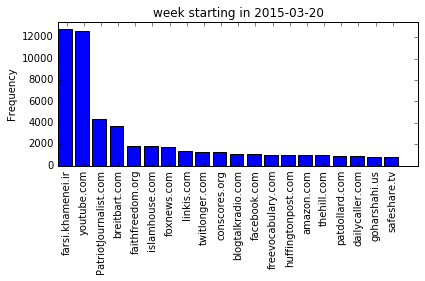

[0.2937300976620302, 0.9467762970607088, 0.9365357716957893, 0.8735542707688072, 0.3325842947857973, 0.8358882836486085, 0.8354880176903915, 0.7475976219846951, 0.7455015778613909, 0.8467486266063261, 0.878330411919369, 0.7095975754054021, 0.0, 0.8256761930984637, 0.8382565257565258, 0.8312061220647174, 0.8544593444018731, 0.8175318984291874, 0.20386988222097588, 0.7738949461062964]


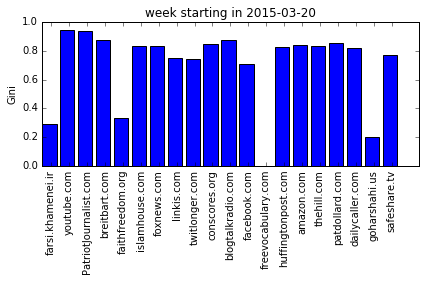

['youtube.com', 'breitbart.com', 'PatriotJournalist.com', 'farsi.khamenei.ir', 'islamhouse.com', 'foxnews.com', 'conscores.org', 'dailycaller.com', 'linkis.com', 'tanzil.net', 'amazon.com', 'patdollard.com', 'facebook.com', 'blogtalkradio.com', 'safeshare.tv', 'shestokas.com', 'rt.com', 'townhall.com', 'twitter.com', 'thehill.com']
[5855, 3521, 3169, 3049, 1705, 1520, 1232, 1138, 1129, 1055, 847, 832, 823, 805, 788, 666, 638, 634, 552, 526]
['tcot', 'pjnet', 'isis', 'islam', 'teaparty', 'ccot', 'muslim', 'p2', '2a', 'wakeupamerica', 'istandwithmariam', 'gop', 'letter4u', 'tlot', 'letter4all', 'quran', 'nra', 'rt', 'news', 'obama']
[33757, 16593, 10253, 9533, 6107, 5941, 5519, 4423, 4209, 4109, 3932, 3788, 3464, 3249, 3061, 2783, 2689, 2399, 2367, 2358]


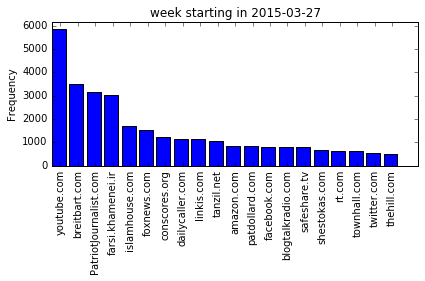

[0.8665549486752365, 0.8657769994276517, 0.9197611940298508, 0.24110984833640317, 0.8404544586823204, 0.8363238064940792, 0.8398345275000513, 0.8398527883035445, 0.7294992532174255, 0.18153037338347597, 0.8474062747763054, 0.833305907520158, 0.8381670338522861, 0.8659634442766972, 0.7749761853558969, 0.8236296194532216, 0.8311925787173312, 0.8046262765610929, 0.6531873999296733, 0.8062258079877007]


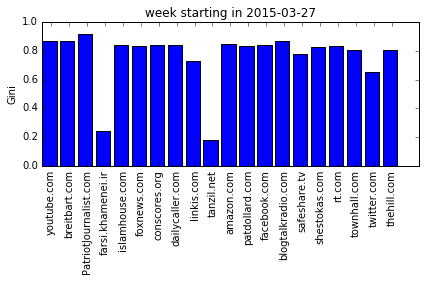

['youtube.com', 'PatriotJournalist.com', 'breitbart.com', 'kickstarter.com', 'foxnews.com', 'vmaster.co', 'investors.com', 'islamhouse.com', 'linkis.com', 'conscores.org', 'simpleislam.weebly.com', 'twitter.com', 'amazon.com', 'safeshare.tv', 'patdollard.com', 'dailycaller.com', 'facebook.com', 'tedcruz.org', 'washingtonpost.com', 'shestokas.com']
[5032, 3607, 3242, 2049, 1366, 1196, 1160, 1140, 1125, 1054, 1052, 908, 800, 796, 766, 738, 722, 580, 563, 560]
['tcot', 'pjnet', 'isis', 'islam', 'ccot', 'teaparty', 'nra', 'p2', '2a', 'wakeupamerica', 'istandwithmariam', 'tlot', 'letter4u', 'muslim', 'gop', 'letter4all', 'tgdn', 'memoriespizza', 'muslims', 'rednationrising']
[30774, 16152, 10916, 9655, 6174, 5518, 4777, 4154, 4140, 4078, 3932, 3773, 3464, 3461, 3313, 3061, 2211, 2112, 2106, 2099]


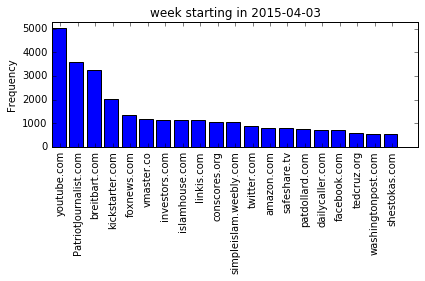

[0.8452600572869907, 0.9225334578275755, 0.8572510379362772, 0.8567999771753009, 0.8417548651416866, 0.2611535647508333, 0.8831703703703704, 0.8007641713872943, 0.737304862878844, 0.8108353510895884, 0.6774428988493904, 0.6800824590870141, 0.8604554865424431, 0.7801455646437725, 0.8251990945289914, 0.8167682044379039, 0.6844555637921094, 0.7501838632922345, 0.7837497889292078, 0.8057016689395415]


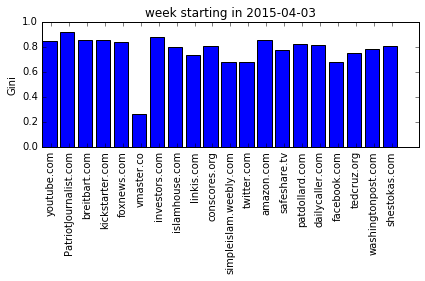

['youtube.com', 'PatriotJournalist.com', 'libertarianrepublican.net', 'breitbart.com', 'twitter.com', 'faithfreedom.org', 't.co', 'islamhouse.com', 'foxnews.com', 'linkis.com', 'amazon.com', 'ConservativeReport.Org', 'rt.com', 'kickstarter.com', 'conscores.org', 'facebook.com', 'dailycaller.com', 'tedcruz.org', 'patdollard.com', 'dailymail.co.uk']
[5079, 3711, 3348, 2714, 2128, 1523, 1484, 1459, 1218, 1085, 921, 837, 765, 667, 615, 601, 573, 558, 495, 494]
['tcot', 'pjnet', 'isis', 'islam', 'p2', 'ccot', 'gop', 'teaparty', 'istandwithmariam', '2a', 'wakeupamerica', 'letter4u', 'nra', 'homophobia', 'jesus', 'letter4all', 'tlot', 'usa', 'rednationrising', 'stopislam']
[30538, 18905, 11615, 9590, 6347, 4959, 4757, 4177, 3932, 3866, 3817, 3464, 3366, 3275, 3216, 3061, 2512, 2248, 2231, 2083]


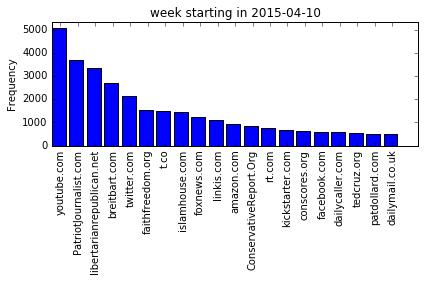

[0.8504964448047064, 0.8943386342376053, 0.1506532663316583, 0.835749665890973, 0.7659536824805281, 0.5961385975055753, 0.8564897484368184, 0.8858144506033407, 0.8228420977727176, 0.735993230761281, 0.8206627883177748, 0.7960417692181475, 0.8873164060177202, 0.6321161882578612, 0.7914344262295082, 0.6977354939884998, 0.8198392127575451, 0.8035479323308271, 0.8068826960466623, 0.747069512238572]


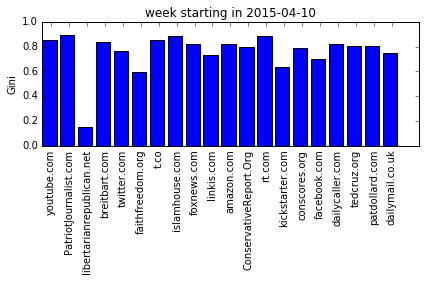

['youtube.com', 't.co', 'breitbart.com', 'PatriotJournalist.com', 'twitter.com', 'islamhouse.com', 'foxnews.com', 'conscores.org', 'linkis.com', 'amazon.com', 'dailycaller.com', 'townhall.com', 'dailymail.co.uk', 'freedomdaily.wpengine.com', 'ConservativeReport.Org', 'simpleislam.weebly.com', 'facebook.com', 'westernjournalism.com', 'faithfreedom.org', 'patdollard.com']
[4763, 3569, 3343, 2771, 2601, 1689, 1328, 1288, 1121, 951, 742, 699, 667, 625, 583, 548, 496, 488, 485, 483]
['tcot', 'pjnet', 'islam', 'isis', 'ccot', 'jesus', 'wakeupamerica', 'teaparty', 'usa', '2a', 'uk', 'christian', 'p2', 'istandwithmariam', 'india', 'africa', 'australia', 'mary', 'letter4u', 'gop']
[29312, 13883, 10662, 10271, 6141, 5395, 5205, 4563, 4494, 4285, 4153, 4082, 3967, 3932, 3818, 3773, 3766, 3681, 3464, 3310]


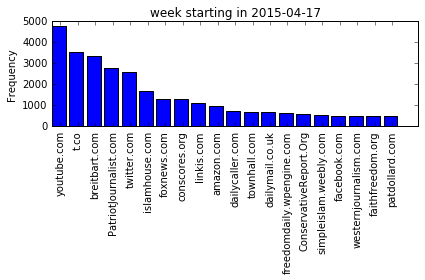

[0.8574829702369956, 0.7415238035820124, 0.8482457319783229, 0.917723394631354, 0.7465506078912978, 0.9003135362698574, 0.8261730014767491, 0.8498136315228967, 0.7601478172700589, 0.8659970440080837, 0.8052696992294308, 0.7863547646383467, 0.7622801447972756, 0.539461549903317, 0.8047050647917263, 0.5659820958399158, 0.6205653461461977, 0.7636685815542027, 0.6014988595633757, 0.8063153660498793]


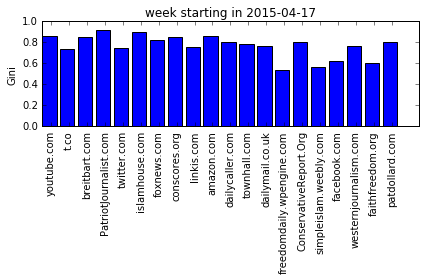

['youtube.com', 't.co', 'PatriotJournalist.com', 'breitbart.com', 'twitter.com', 'conscores.org', 'foxnews.com', 'facebook.com', 'linkis.com', 'conservativetribune.com', 'foreignaffairs.house.gov', 'amazon.com', 'dailycaller.com', 'islamhouse.com', 'goharshahi.us', 'toginet.com', 'thehilltalk.com', 'simpleislam.weebly.com', 'investors.com', 'safeshare.tv']
[6447, 4580, 3234, 2775, 2611, 1398, 1217, 1203, 1116, 1071, 979, 897, 870, 805, 665, 642, 586, 562, 559, 534]
['tcot', 'pjnet', 'islam', 'isis', 'ccot', 'usa', 'jesus', 'uk', 'wakeupamerica', 'christian', 'india', 'africa', 'australia', 'mary', 'teaparty', '2a', 'istandwithmariam', 'p2', 'tlot', 'stopislam']
[30156, 14626, 11350, 10687, 6074, 5684, 5566, 5275, 5191, 5072, 4940, 4775, 4716, 4697, 4275, 4223, 3932, 3304, 3229, 3200]


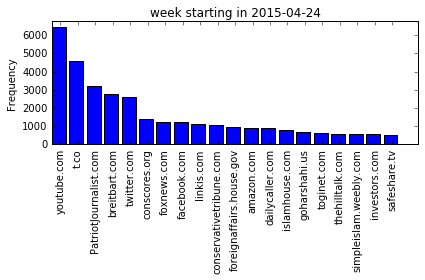

[0.8929975934122187, 0.0, 0.9040178127671418, 0.8462977576330692, 0.7288576837471357, 0.8617650775715315, 0.8249637074346695, 0.7468001089324618, 0.7458133621697451, 0.8842809466948348, 0.8547299621603027, 0.8286375767518441, 0.8205824656707409, 0.8367449713060112, 0.4756104923179088, 0.6598606705935659, 0.8584056676027572, 0.5193819463269178, 0.7139200390053633, 0.8037276909839898]


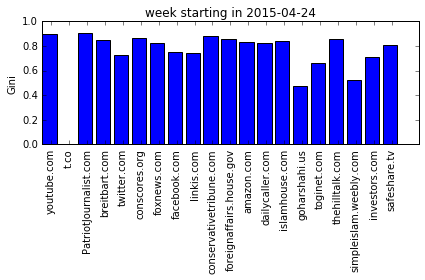

['youtube.com', 'PatriotJournalist.com', 'twitter.com', 'breitbart.com', 't.co', 'conscores.org', 'linkis.com', 'foxnews.com', 'conservativetribune.com', 'islamhouse.com', 'amazon.com', 'rt.com', 'patdollard.com', 'toginet.com', 'washingtontimes.com', 'twitlonger.com', 'dailycaller.com', 'safeshare.tv', 'dailymail.co.uk', 'facebook.com']
[6039, 4816, 4316, 3482, 3162, 1949, 1460, 1416, 1391, 1317, 1196, 898, 872, 800, 786, 688, 678, 648, 611, 607]
['tcot', 'pjnet', 'islam', 'isis', 'ccot', 'wakeupamerica', '2a', 'teaparty', 'usa', 'jesus', 'uk', 'gop', 'christian', 'istandwithmariam', 'p2', 'india', 'africa', 'australia', 'rednationrising', 'mary']
[34798, 19242, 12449, 12108, 7784, 7276, 5573, 5443, 5035, 4620, 4546, 4281, 3944, 3932, 3813, 3689, 3590, 3475, 3426, 3355]


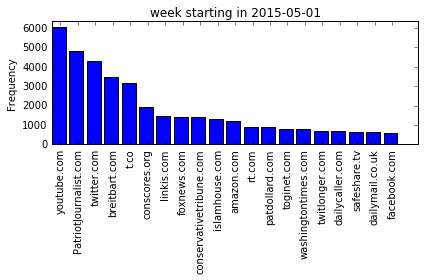

[0.8564568170932285, 0.9004488677127982, 0.7874831802109395, 0.853039409157747, 0.0, 0.871662215575259, 0.756972710453284, 0.8320795955996603, 0.8834343434343435, 0.817413749910529, 0.854860570291432, 0.9120979953443171, 0.8119473319473319, 0.510809917355372, 0.7735613010842368, 0.7472852420413894, 0.8035711039610259, 0.7787906180366639, 0.7909537315120205, 0.6220667775165797]


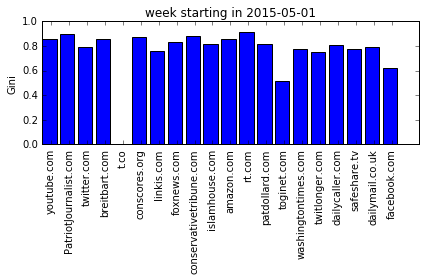

['youtube.com', 'twitter.com', 'breitbart.com', 'conscores.org', 'foxnews.com', 'linkis.com', 'conservativetribune.com', 'amazon.com', 'patdollard.com', 'farsi.khamenei.ir', 'americanthinker.com', 'ConservativeReport.Org', 'investors.com', 'PatriotJournalist.com', 'lifequotesa1.blogspot.com', 'islamhouse.com', 'facebook.com', 'cnn.com', 'dailycaller.com', 'lifenews.com']
[4254, 3966, 3287, 1618, 1432, 1198, 942, 852, 850, 815, 700, 699, 633, 631, 616, 608, 588, 577, 548, 539]
['tcot', 'pjnet', 'isis', 'islam', 'ccot', 'wakeupamerica', '2a', 'gop', 'teaparty', 'istandwithmariam', 'letter4all', 'p2', 'tlot', 'muslim', 'veterans', 'rt', 'rednationrising', 'usa', 'nra', 'infidelivesmatter']
[29641, 11477, 9279, 8664, 5885, 5305, 5003, 4358, 4071, 3932, 3061, 2906, 2713, 2609, 2458, 2219, 2171, 2095, 2039, 2022]


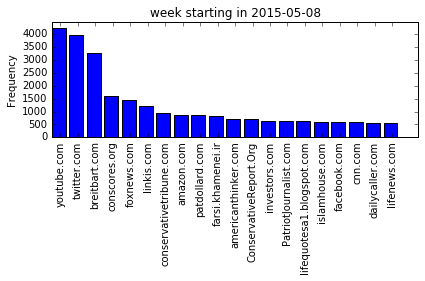

[0.8319804832506171, 0.778857024257652, 0.8288156462889257, 0.8519163502198157, 0.8418725379424069, 0.7535315311843702, 0.8539376184732035, 0.8603565791361745, 0.8523729938309533, 0.4591071428571429, 0.8067882804553955, 0.7758277392194789, 0.7852096164066652, 0.7710814212411656, 0.32883996644841446, 0.7960886673514866, 0.6345455786176397, 0.805461478638268, 0.7958683473389355, 0.8675624589086127]


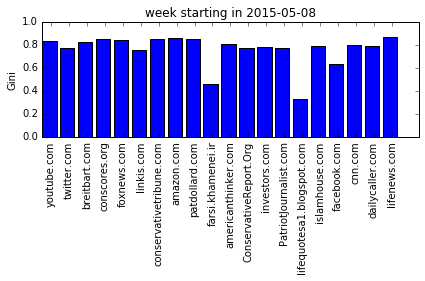

['twitter.com', 'youtube.com', 'breitbart.com', 'foxnews.com', 'linkis.com', 'foreignaffairs.house.gov', 'simpleislam.weebly.com', 'patdollard.com', 'twitlonger.com', 'cnn.com', 'conservativetribune.com', 'farsi.khamenei.ir', 'amazon.com', 'islamhouse.com', 'mojahedin.org', 'rt.com', 'washingtontimes.com', 'goharshahi.us', 'dailycaller.com', 'wnd.com']
[972, 961, 424, 315, 275, 260, 217, 185, 184, 171, 167, 156, 156, 139, 131, 123, 121, 112, 103, 103]
['tcot', 'istandwithmariam', 'isis', 'letter4all', 'infidelivesmatter', 'pjnet', 'islam', 'letter4youth', 'sat', 'vpnmaster', 'ccot', 'arabidol', 'qarlivegate', 'prunier', 'vanderwall', 'wakeupamerica', 'gop', 'darrenwilson', 'teaparty', 'billiondollarbully']
[4797, 3932, 3553, 3061, 2022, 1544, 1525, 1132, 1027, 886, 874, 859, 800, 799, 799, 775, 766, 710, 668, 660]


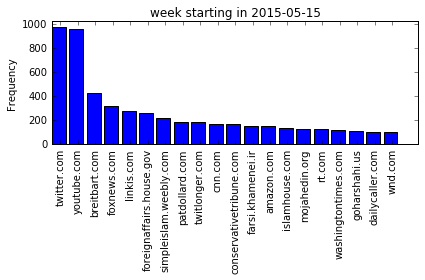

[0.7673819766068377, 0.7782920809330517, 0.6995039349520719, 0.7234985528219972, 0.6578876256384907, 0.5888183980967486, 0.5006313131313131, 0.6899841017488076, 0.7093475000451744, 0.7892416225749559, 0.7771292693471682, 0.4393472906403941, 0.7598155467720685, 0.6911840688912809, 0.5554847841472045, 0.6954666666666667, 0.597612958226769, 0.5129378630522795, 0.6665812732163443, 0.6495267032838612]


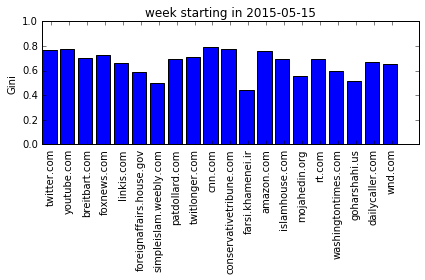

['youtube.com', 'twitter.com', 'breitbart.com', 'foxnews.com', 'facebook.com', 'linkis.com', 'conservativetribune.com', 'amazon.com', 'rt.com', 'islamhouse.com', 'farsi.khamenei.ir', 'dailymail.co.uk', 'dailycaller.com', 'patdollard.com', 'goharshahi.us', 'instagram.com', 'washingtonpost.com', 'investors.com', 'squadleaders.org', 'cnn.com']
[1423, 1144, 725, 435, 378, 357, 305, 287, 248, 246, 223, 209, 203, 183, 166, 148, 146, 139, 138, 134]
['tcot', 'isis', 'istandwithmariam', 'letter4all', 'pjnet', 'islam', 'infidelivesmatter', 'ccot', 'wakeupamerica', 'letter4youth', 'sat', 'teaparty', 'veterans', 'gop', '2a', 'vpnmaster', 'arabidol', 'p2', 'qarlivegate', 'prunier']
[7056, 4380, 3932, 3061, 2775, 2359, 2022, 1308, 1246, 1132, 1027, 977, 918, 891, 889, 886, 859, 808, 800, 799]


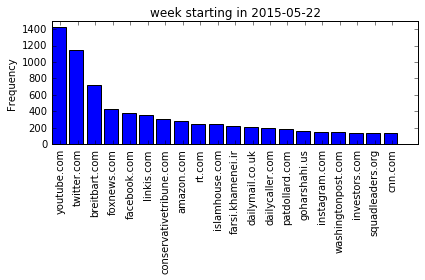

[0.7935497832503456, 0.6898385030749524, 0.7545580623525293, 0.709265625, 0.764124893797791, 0.6326383980466262, 0.739166899636567, 0.7978362076537933, 0.8253577817531306, 0.7292188431723315, 0.5650277234181343, 0.6383669966592086, 0.7113935969868174, 0.7107294117647058, 0.5176858513189448, 0.44899280923903834, 0.6391092292850252, 0.6344827586206897, 0.0, 0.636734693877551]


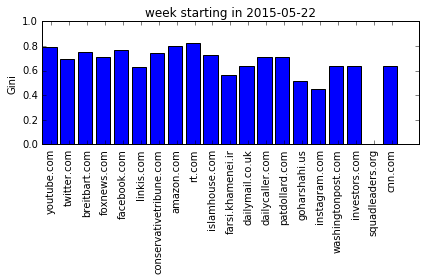

['youtube.com', 'twitter.com', 'tweetmyjobs.com', 'breitbart.com', 'conscores.org', 'linkis.com', 'amazon.com', 'conservativetribune.com', 'foxnews.com', 'goharshahi.us', 'islamhouse.com', 'farsi.khamenei.ir', 'dailycaller.com', 'cnn.com', 'rt.com', 'twitlonger.com', 'patdollard.com', 'google.com', 'facebook.com', 'washingtontimes.com']
[5704, 4866, 3696, 3576, 1614, 1392, 1203, 1160, 1147, 1110, 1007, 973, 940, 916, 882, 705, 693, 665, 651, 645]
['tcot', 'isis', 'pjnet', 'islam', 'wakeupamerica', 'veterans', 'ccot', '2a', 'teaparty', 'istandwithmariam', 'p2', 'job', 'gop', 'muslim', 'tlot', 'letter4all', 'nra', 'rednationrising', 'is', 'hiring']
[31470, 15876, 12353, 9413, 6738, 6432, 5750, 5233, 4321, 3932, 3646, 3529, 3300, 3276, 3076, 3061, 2967, 2958, 2900, 2764]


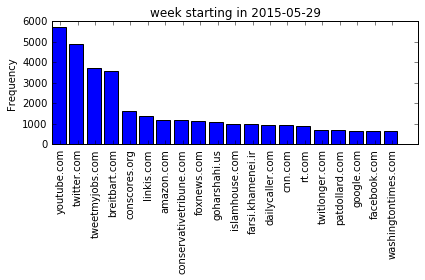

[0.8685606771307439, 0.7917568740603824, 0.906733892485455, 0.8444786050068516, 0.8626730462519936, 0.7606816259015884, 0.8788910113965668, 0.882195899536041, 0.8043259644937442, 0.5245240196696508, 0.8143098640116533, 0.6784296279447821, 0.8204683305897881, 0.8106433949349761, 0.875467362001149, 0.7716955235217622, 0.8017241379310345, 0.7063177534947966, 0.6262504990723127, 0.7591800525932263]


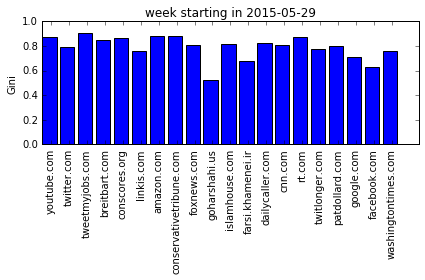

['youtube.com', 'twitter.com', 'breitbart.com', 'tweetmyjobs.com', 'conscores.org', 'linkis.com', 'foxnews.com', 'amazon.com', 'patdollard.com', 'farsi.khamenei.ir', 'conservativetribune.com', 'rt.com', 'islamhouse.com', 'dailycaller.com', 'investors.com', 'washingtonpost.com', 'google.com', '3tags.org', 'wnd.com', 'facebook.com']
[5324, 4516, 4252, 4092, 1866, 1353, 1157, 1087, 1021, 1003, 941, 828, 764, 734, 646, 636, 604, 577, 559, 550]
['tcot', 'isis', 'pjnet', 'islam', 'wakeupamerica', 'veterans', 'ccot', '2a', 'teaparty', 'gop', 'istandwithmariam', 'job', 'rednationrising', 'p2', 'letter4all', 'hiring', 'tlot', 'muslim', 'nra', 'uniteblue']
[31592, 14070, 11618, 7962, 6745, 6724, 5799, 4950, 4303, 3939, 3932, 3909, 3750, 3558, 3061, 3058, 2965, 2924, 2812, 2544]


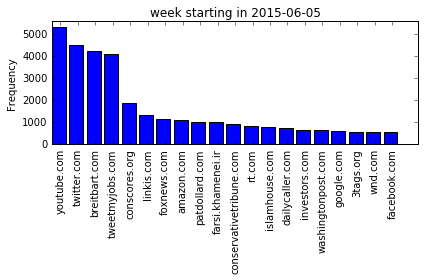

[0.8672191091678951, 0.7809239528167193, 0.858023058023058, 0.9020667198500862, 0.8674631526292121, 0.7440683383882223, 0.8193824542758408, 0.8554824464561713, 0.83030350808041, 0.70025390625, 0.8816558861578266, 0.8569755771160923, 0.7956316317073632, 0.8065443525268244, 0.8323300080266025, 0.7959438830879728, 0.6650015918846817, 0.8469213920661962, 0.7601867394917279, 0.618165557964889]


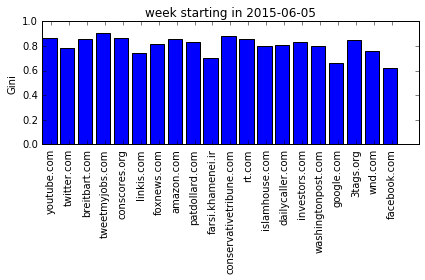

['twitter.com', 'youtube.com', 'tweetmyjobs.com', 'instagram.com', 'breitbart.com', 'simpleislam.weebly.com', 'twitlonger.com', 'conscores.org', 'linkis.com', 'investors.com', 'foxnews.com', 'amazon.com', 'goharshahi.us', 'patdollard.com', 'conservativetribune.com', 'islamhouse.com', '3tags.org', 'facebook.com', 'farsi.khamenei.ir', 'dailycaller.com']
[5399, 4834, 3852, 3234, 3203, 2217, 2040, 1988, 1259, 1100, 1093, 1088, 1047, 1010, 915, 776, 706, 683, 642, 600]
['tcot', 'isis', 'pjnet', 'islam', 'veterans', 'ccot', 'wakeupamerica', 'teaparty', '2a', 'istandwithmariam', 'gop', 'rednationrising', 'job', 'is', 'p2', 'muslim', 'letter4all', 'makeamericagreatagain', 'tlot', 'hiring']
[32419, 13579, 12868, 9388, 6141, 5576, 5359, 4396, 4001, 3932, 3902, 3578, 3556, 3310, 3276, 3126, 3061, 3000, 2896, 2717]


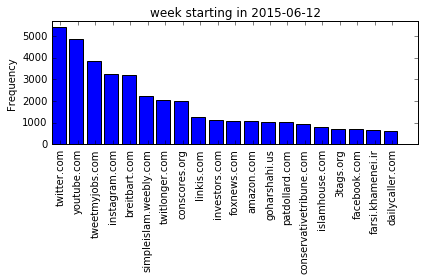

[0.7913922154919651, 0.8497681455699092, 0.8975048217909859, 0.7582665365991256, 0.8469520688710267, 0.8176562402447399, 0.7611126405975832, 0.8479568793182478, 0.745343588765018, 0.8689493723925598, 0.7920436856958453, 0.859948726430698, 0.4282554902567275, 0.8419305724725944, 0.8831947331947332, 0.7881282255832506, 0.7058765915768854, 0.6445935609772232, 0.6135867892461895, 0.8000783007494501]


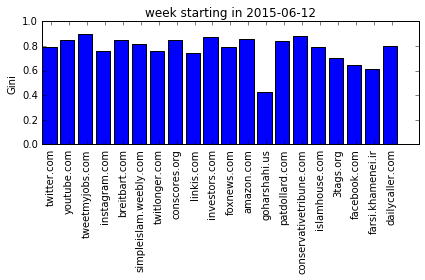

['twitter.com', 'youtube.com', 'tweetmyjobs.com', 'breitbart.com', 'conscores.org', 'investors.com', 'linkis.com', 'toginet.com', 'foxnews.com', 'patdollard.com', 'facebook.com', 'twitlonger.com', 'islamhouse.com', 'cnn.com', 'conservativetribune.com', 'goharshahi.us', 'instagram.com', 'simpleislam.weebly.com', '3tags.org', 'dailycaller.com']
[6700, 4328, 3916, 3820, 2255, 1556, 1464, 1450, 1238, 1084, 950, 865, 842, 790, 779, 751, 716, 626, 619, 590]
['tcot', 'pjnet', 'isis', 'veterans', 'islam', 'wakeupamerica', 'ccot', '2a', 'teaparty', 'gop', 'istandwithmariam', 'p2', 'job', 'rednationrising', 'nra', 'tlot', 'muslim', 'letter4all', 'hiring', 'is']
[34182, 13866, 12726, 7116, 6575, 6029, 5824, 5528, 4591, 4248, 3932, 3657, 3587, 3562, 3452, 3104, 3089, 3061, 2790, 2428]


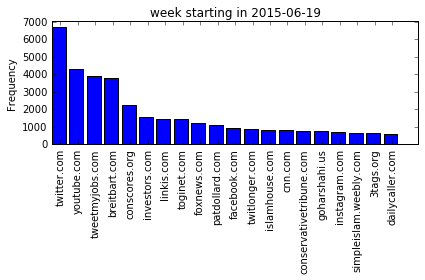

[0.8035998993943957, 0.8526321747756993, 0.8986186406286143, 0.8511180633017289, 0.8720858550342656, 0.8939368224998586, 0.7665128514246254, 0.577549182599058, 0.8046523703777358, 0.843174188058137, 0.6877400807633366, 0.7700823354857584, 0.7986101324815341, 0.80727969348659, 0.8877341951291637, 0.5522270522270523, 0.5924468529310314, 0.6179153094462541, 0.906997661449901, 0.7971835510816021]


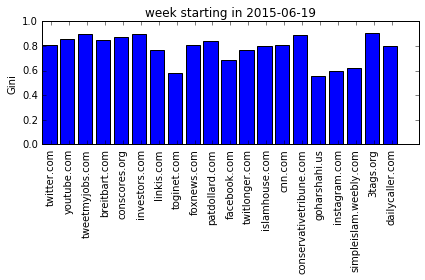

['tweetmyjobs.com', 'twitter.com', 'youtube.com', 'breitbart.com', 'conscores.org', 'foxnews.com', 'investors.com', 'patdollard.com', 'linkis.com', 'conservativetribune.com', 'facebook.com', 'dailycaller.com', 'goharshahi.us', 'cnn.com', 'theblaze.com', 'instagram.com', 'islamhouse.com', '3tags.org', 'thehilltalk.com', 'rt.com']
[10716, 7738, 4408, 3672, 2564, 1825, 1633, 1622, 1452, 1229, 943, 878, 776, 762, 720, 714, 712, 712, 653, 643]
['tcot', 'pjnet', 'isis', 'veterans', 'job', 'hiring', 'wakeupamerica', 'ccot', 'islam', 'rednationrising', 'jobs', 'teaparty', 'tweetmyjobs', '2a', 'gop', 'p2', 'istandwithmariam', 'tlot', 'letter4all', 'hospitality']
[39415, 16482, 15933, 13063, 10171, 8661, 6987, 6944, 6917, 5276, 5217, 4997, 4984, 4702, 4420, 4095, 3932, 3638, 3061, 3023]


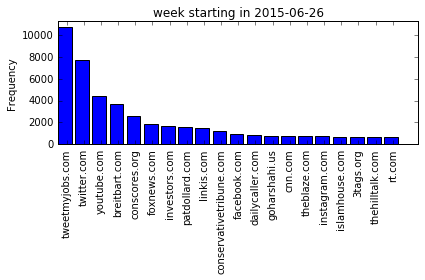

[0.9316166904964057, 0.8173686913320753, 0.8106668257106033, 0.8506642845876017, 0.8800047153943249, 0.8383915859552026, 0.8865961713139899, 0.8738603133561117, 0.7765721495451225, 0.8925641025641026, 0.6803203750352568, 0.8097026737967914, 0.493778057478498, 0.7982051577693224, 0.7949190510131351, 0.5588473907090776, 0.7932209553943229, 0.9130619168787107, 0.8126009986382207, 0.823113748423346]


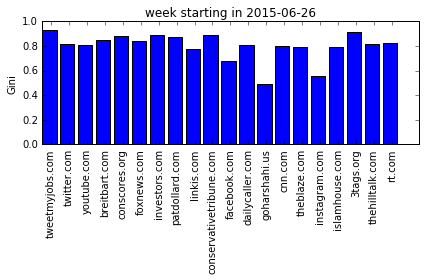

['tweetmyjobs.com', 'twitter.com', 'youtube.com', 'breitbart.com', 'conscores.org', 'foxnews.com', 'investors.com', 'patdollard.com', 'linkis.com', 'goharshahi.us', 'conservativetribune.com', 'dailymail.co.uk', 'dailycaller.com', 'instagram.com', 'facebook.com', 'infowars.com', 'twitlonger.com', 'google.com', 'islamhouse.com', 'cnn.com']
[11050, 7022, 6145, 5794, 2324, 1987, 1912, 1653, 1581, 1282, 1138, 938, 889, 836, 788, 773, 771, 761, 756, 719]
['tcot', 'pjnet', 'isis', 'veterans', 'job', 'hiring', 'islam', 'wakeupamerica', 'ccot', 'tweetmyjobs', 'jobs', 'rednationrising', 'teaparty', '2a', 'gop', 'istandwithmariam', 'trump', 'hospitality', 'tlot', 'p2']
[40473, 16720, 15306, 13986, 10463, 9035, 7939, 7331, 6449, 5813, 5258, 4733, 4500, 4403, 4260, 3932, 3902, 3848, 3833, 3739]


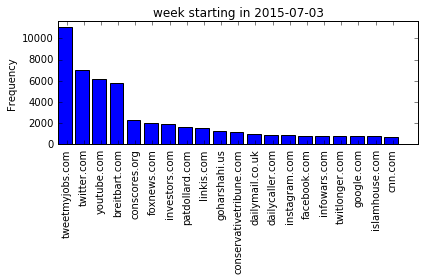

[0.9379317260707848, 0.7969070388644601, 0.8685232781801323, 0.8733555404302888, 0.8680371727679046, 0.8211042139859632, 0.8654582040368757, 0.8799873148081664, 0.7696004286986059, 0.5506126378435148, 0.8966016991504248, 0.7738717677671166, 0.8207474226804123, 0.6327230540218325, 0.6569285961579259, 0.7978779300435351, 0.7383807303807304, 0.7057577878893945, 0.7989292502607569, 0.7689670736737251]


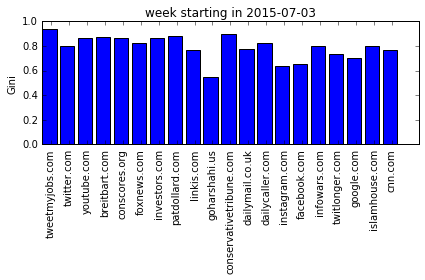

['tweetmyjobs.com', 'twitter.com', 'youtube.com', 'breitbart.com', 'conscores.org', 'linkis.com', 'investors.com', 'patdollard.com', 'goharshahi.us', 'conservativetribune.com', 'wounded.wpengine.com', 'flickr.com', 'foxnews.com', 'washingtonpost.com', 'instagram.com', 'islamhouse.com', '3tags.org', 'scoop.it', 'google.com', 'dailycaller.com']
[10616, 8718, 7115, 4878, 1927, 1791, 1786, 1640, 1577, 1325, 1255, 1221, 1128, 1034, 875, 819, 798, 736, 731, 689]
['tcot', 'pjnet', 'isis', 'veterans', 'job', 'islam', 'hiring', 'ccot', 'wakeupamerica', 'jobs', 'tweetmyjobs', 'gop', 'rednationrising', 'trump', 'teaparty', 'p2', 'is', 'tlot', 'istandwithmariam', '2a']
[42486, 16385, 14252, 13627, 10103, 9180, 8531, 6691, 6347, 5098, 4986, 4932, 4797, 4581, 4432, 4335, 4326, 4028, 3932, 3607]


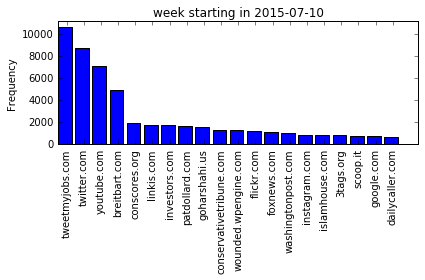

[0.9322448343649969, 0.8213126708879093, 0.891708134719776, 0.8777403119280656, 0.8596708803840938, 0.7913346526330537, 0.8726193474115912, 0.8867666815942677, 0.5975497843443149, 0.8976089159067883, 0.5587909276944065, 0.7103884766477521, 0.7843752763948665, 0.8058884200656352, 0.667224141955018, 0.8116722469251095, 0.9105161356001221, 0.7645267665163921, 0.7243402606049992, 0.7973410629270978]


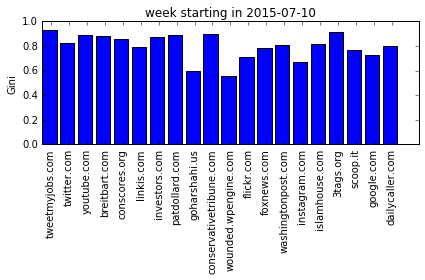

['twitter.com', 'tweetmyjobs.com', 'youtube.com', 'breitbart.com', 'conscores.org', 'investors.com', 'linkis.com', 'foxnews.com', 'flickr.com', 'patdollard.com', 'nemozawa.xyz', 'conservativetribune.com', 'scoop.it', 'twnews.info', 'google.com', 'facebook.com', 'americanthinker.com', 'townhall.com', 'nypost.com', 'islamhouse.com']
[8612, 8573, 6137, 4990, 1989, 1771, 1705, 1657, 1243, 1223, 1222, 1054, 949, 892, 871, 866, 816, 802, 741, 722]
['tcot', 'pjnet', 'isis', 'veterans', 'job', 'wakeupamerica', 'islam', 'hiring', 'ccot', '2a', 'gop', 'rednationrising', 'tweetmyjobs', 'trump', 'teaparty', 'jobs', 'istandwithmariam', 'p2', 'tlot', 'letter4all']
[38189, 14793, 13757, 11457, 8161, 7742, 7427, 6985, 6568, 5053, 5013, 4708, 4294, 4182, 4171, 4147, 3932, 3356, 3241, 3061]


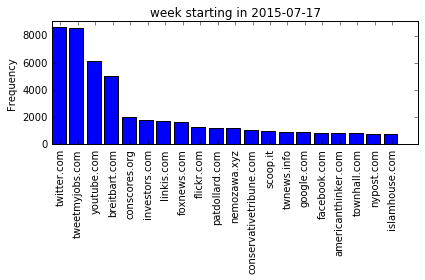

[0.8249888415872237, 0.9276558832628996, 0.8688522180552778, 0.8622272279605075, 0.8509203127745563, 0.8247451317090064, 0.7898877412626605, 0.8290718194167608, 0.6219765078239041, 0.8574224902128426, 0.0, 0.8677421607654165, 0.7417258932001537, 0.0, 0.6893078876816706, 0.6820165519701059, 0.8130680644494939, 0.7885148956744895, 0.8378940164468535, 0.7794052169386105]


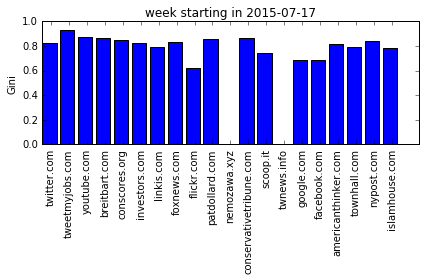

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'nemozawa.xyz', 'flickr.com', 'investors.com', 'linkis.com', 'patdollard.com', 'foxnews.com', 'conservativetribune.com', 'conscores.org', 'americanthinker.com', 'google.com', 'islamhouse.com', 'dailycaller.com', 'ConservativeReport.Org', 'instagram.com', '3tags.org', 'washingtonpost.com']
[11280, 9864, 8418, 5186, 4073, 3705, 1977, 1818, 1572, 1383, 1316, 1157, 1047, 1007, 921, 883, 855, 849, 789, 769]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'job', 'hiring', 'ccot', 'wakeupamerica', 'gop', 'careerarc', '2a', 'defundpp', 'teaparty', 'rednationrising', 'jobs', 'p2', 'istandwithmariam', 'trump', 'tlot']
[43100, 21025, 16888, 12978, 10007, 9325, 8024, 7479, 6931, 6800, 5201, 5073, 4971, 4867, 4697, 4671, 4194, 3932, 3631, 3495]


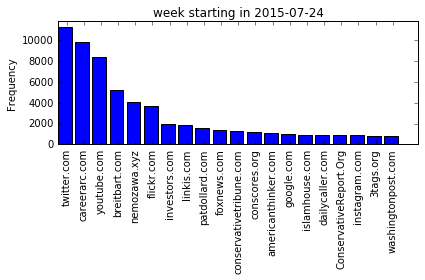

[0.8395366601867489, 0.9325588172650099, 0.8981605492968275, 0.8704311960447447, 0.0, 0.7519937350960131, 0.8464511916421809, 0.7955564082644264, 0.8874210645015788, 0.7928242823309715, 0.8966650318783718, 0.846982917467499, 0.8245734657499363, 0.6777106560039813, 0.7945141110060081, 0.8058454652919572, 0.8561210563299141, 0.607876105599311, 0.9004520341536916, 0.7423462420091482]


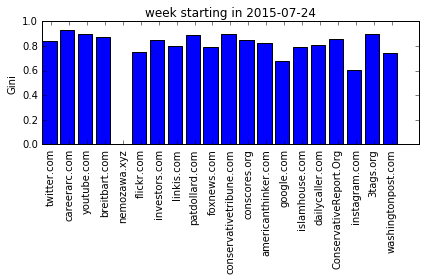

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'flickr.com', 'goharshahi.us', 'foxnews.com', 'lifenews.com', 'investors.com', 'linkis.com', 'facebook.com', 'patdollard.com', 'conservativetribune.com', 'google.com', 'wnd.com', 'theawaitedone.com', 'twitlonger.com', 'americanthinker.com', 'dailycaller.com', 'thehill.com']
[12874, 9588, 8975, 4990, 4455, 2838, 2218, 2043, 1805, 1799, 1542, 1468, 1092, 1080, 1033, 987, 983, 958, 865, 840]
['tcot', 'isis', 'pjnet', 'defundpp', 'veterans', 'gopdebate', 'islam', 'job', 'is', 'hiring', 'ccot', 'wakeupamerica', 'gop', 'taliban', 'careerarc', 'teaparty', 'jobs', '2a', 'isil', 'istandwithmariam']
[40255, 19848, 15848, 13178, 12712, 12697, 10180, 9072, 7920, 7777, 7076, 6846, 6050, 5862, 5139, 4547, 4540, 4425, 3946, 3932]


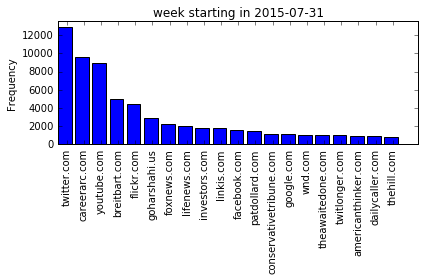

[0.8408381665611085, 0.9305776707981462, 0.8953056902343612, 0.867329351495099, 0.6549247786085416, 0.5842765981509773, 0.8134525369240625, 0.9063267813267813, 0.8820823671741103, 0.7881576125256611, 0.7816231133697984, 0.8711309523809524, 0.8786882341869554, 0.6939392270518099, 0.8112954186413902, 0.5796674274535376, 0.7917313370342831, 0.8425584011647145, 0.8256162340380993, 0.7716720110932963]


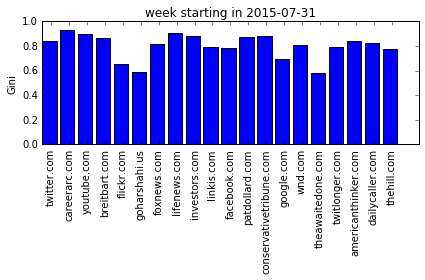

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'flickr.com', 'amp.twimg.com', 'cnn.com', 'foxnews.com', 'thehill.com', 'linkis.com', 'goharshahi.us', 'vine.co', 'hillaryclinton.com', 'investors.com', 'google.com', 'facebook.com', 'lifenews.com', 'nytimes.com', 'twitlonger.com', 'amazon.com']
[19305, 9612, 9518, 5426, 5228, 3339, 2396, 2289, 2285, 2246, 1964, 1959, 1897, 1841, 1752, 1713, 1534, 1491, 1417, 1245]
['gopdebate', 'tcot', 'isis', 'pjnet', 'veterans', 'islam', 'job', 'hiring', 'trump', 'ccot', 'gop', 'is', 'wakeupamerica', 'careerarc', 'jobs', 'foxnews', 'teaparty', 'defundpp', 'taliban', 'cruzcrew']
[54430, 40455, 21938, 15029, 12476, 10849, 9069, 7717, 7403, 6749, 6653, 6141, 6045, 5164, 4958, 4922, 4860, 4629, 4554, 4337]


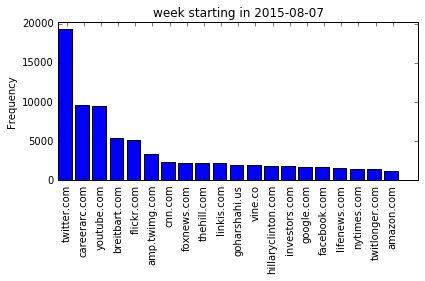

[0.8603578692183325, 0.931836806302019, 0.873909787705123, 0.862348377535801, 0.7053970434637449, 0.9056151419558359, 0.8613418755280203, 0.8463310050152275, 0.8705758089812118, 0.8296966582958998, 0.5493700636768605, 0.8433426278883712, 0.9307621936540036, 0.8573021645021645, 0.8091991729617087, 0.7540659475037511, 0.872490221642764, 0.8048971786364217, 0.8520354995705697, 0.870166588622593]


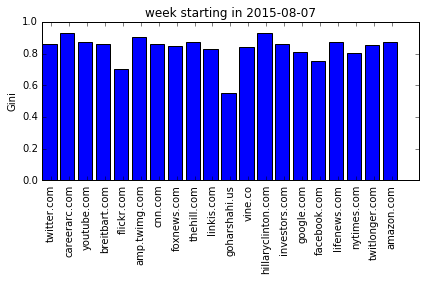

['twitter.com', 'careerarc.com', 'youtube.com', 'linkis.com', 'breitbart.com', 'flickr.com', 'goharshahi.us', 'investors.com', 'foxnews.com', 'google.com', 'islamhouse.com', 'twitlonger.com', 'amazon.com', 'theawaitedone.com', 'conscores.org', 'lifenews.com', 'buzzlingfire.xyz', 'facebook.com', 'thehilltalk.com', '3tags.org']
[8762, 8124, 5716, 5642, 4216, 3451, 2509, 1551, 1422, 1294, 1150, 1131, 997, 991, 987, 969, 854, 788, 755, 754]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'is', 'job', 'taliban', 'hiring', 'islamicstate', 'ccot', 'wakeupamerica', 'isil', 'careerarc', 'gop', 'trump', 'teaparty', 'istandwithmariam', 'defundpp', 'jobs']
[32424, 24382, 13626, 10731, 10543, 10100, 7683, 6816, 6495, 6377, 5818, 4955, 4552, 4274, 4218, 4141, 4007, 3932, 3836, 3834]


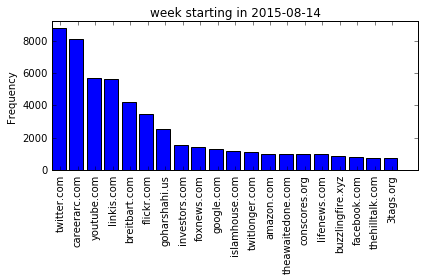

[0.8313179665635463, 0.9273590234114624, 0.8804963862306576, 0.9262088635927608, 0.8635867855249473, 0.6922315020180903, 0.6508553430561712, 0.8792988518256516, 0.7989031387107661, 0.7890717510167162, 0.8000560416888374, 0.7368221709152715, 0.8651103603370907, 0.6198301486199576, 0.8446116630515313, 0.8488885243212205, 0.48614318706697457, 0.6278835981259189, 0.7552841684818868, 0.8847763017254543]


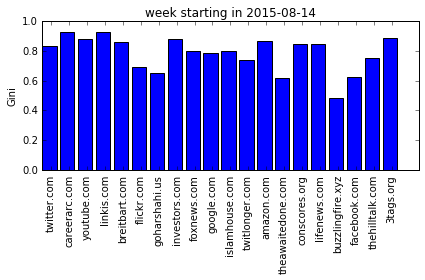

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'goharshahi.us', 'flickr.com', 'linkis.com', 'investors.com', 'foxnews.com', 'google.com', 'facebook.com', 'americanthinker.com', 'twitlonger.com', 'theawaitedone.com', 'lifenews.com', 'conscores.org', 'amazon.com', 'buzzlingfire.xyz', 'conservativetribune.com', 'thehilltalk.com']
[12951, 9535, 8222, 4538, 4378, 3474, 2211, 1549, 1537, 1485, 1478, 1463, 1372, 1265, 1207, 1091, 1077, 1061, 958, 950]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'is', 'job', 'hiring', 'trump', 'islamicstate', 'ccot', 'defundpp', 'wakeupamerica', 'isil', 'gop', 'careerarc', 'taliban', '2a', 'trump2016', 'teaparty']
[39018, 24212, 16808, 12268, 10384, 10221, 9035, 7777, 7614, 7432, 7220, 6982, 6542, 6062, 5437, 5213, 5082, 4871, 4685, 4611]


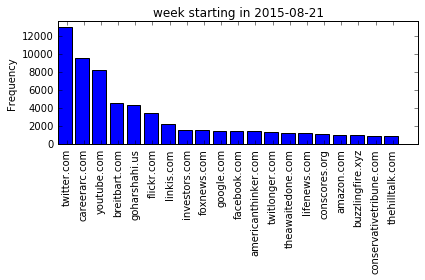

[0.8425964771043806, 0.9303248704711606, 0.8934478314987453, 0.8693922735748812, 0.7436501329356808, 0.7041734512387585, 0.8423388253579742, 0.8562822644908706, 0.8143779720235618, 0.8017804264007337, 0.7794949601872434, 0.8391548620448837, 0.8602949061662198, 0.3883316945263848, 0.8558299751293408, 0.8643706600686407, 0.856441686963513, 0.4943767572633552, 0.8382927326630171, 0.7656744377913108]


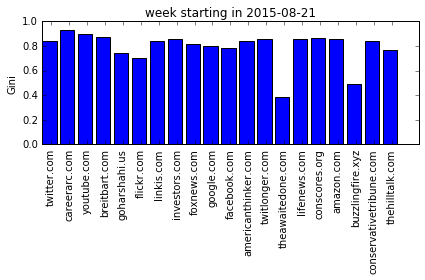

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'flickr.com', 'linkis.com', 'facebook.com', 'thehilltalk.com', 'investors.com', 'google.com', 'foxnews.com', 'americanthinker.com', 'goharshahi.us', 'amazon.com', 'islamhouse.com', 'lifenews.com', 'cnn.com', 'conservativetribune.com', '3tags.org', 'buzzlingfire.xyz']
[12007, 9445, 7074, 5743, 2596, 1987, 1961, 1710, 1605, 1446, 1361, 1313, 1310, 1215, 1139, 1090, 1048, 921, 835, 724]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'job', 'hiring', 'ccot', 'wakeupamerica', 'trump', '2a', 'gop', 'careerarc', 'trump2016', 'jobs', 'teaparty', 'is', 'nra', 'istandwithmariam', 'p2']
[41284, 16800, 15937, 12334, 9981, 9019, 7629, 7245, 6820, 6426, 5987, 5164, 5011, 4684, 4586, 4446, 4061, 3946, 3932, 3608]


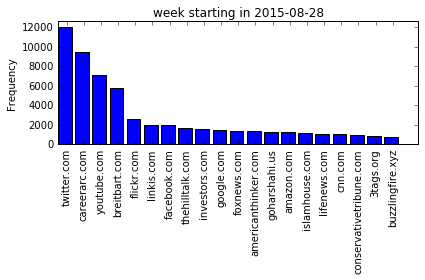

[0.8339753788385974, 0.9301013086587852, 0.8590154840315596, 0.8660028629930961, 0.6812554405087969, 0.8394172369438975, 0.8056966663385406, 0.7653831996071234, 0.847906437481033, 0.7803077240809583, 0.7988730859666227, 0.8514956514956515, 0.624005626999639, 0.8722766465496116, 0.7981169224745792, 0.8636304665754588, 0.8208329257170628, 0.8516332378223496, 0.9087219935985368, 0.48637602179836514]


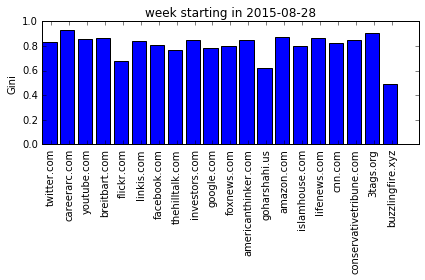

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'newswire.net', 'flickr.com', 'thehilltalk.com', 'linkis.com', 'google.com', 'investors.com', 'rt.com', 'islamhouse.com', 'facebook.com', 'foxnews.com', 'teaparty.org', 'sugarsync.com', 'dailycaller.com', 'buzzlingfire.xyz', '3tags.org', 'conservativetribune.com']
[10272, 8274, 6146, 4914, 4194, 2585, 2244, 1552, 1233, 1216, 1127, 1006, 970, 951, 800, 798, 796, 796, 751, 733]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'trump', 'job', 'wakeupamerica', 'hiring', 'ccot', 'is', 'hillary', 'careerarc', 'gop', 'isil', 'snowden', 'jobs', '2a', 'teaparty', 'istandwithmariam']
[34083, 16745, 13153, 10373, 8615, 8293, 7834, 6753, 6589, 6369, 4579, 4443, 4379, 4312, 4090, 4087, 3992, 3990, 3983, 3932]


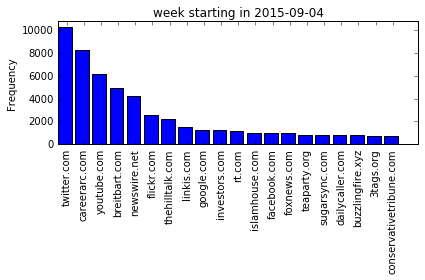

[0.8286746834738108, 0.9275301516373632, 0.865900029634807, 0.8782539352479051, 0.24486108880680907, 0.668029932087366, 0.7958611875737318, 0.7983374753432148, 0.7414181555026625, 0.8619635936820164, 0.8581866052328452, 0.7965066174207448, 0.7048764886348358, 0.8124484661409332, 0.8257275132275133, 0.5708163265306122, 0.7962268572767752, 0.48514851485148514, 0.9046503078761143, 0.8482871125611745]


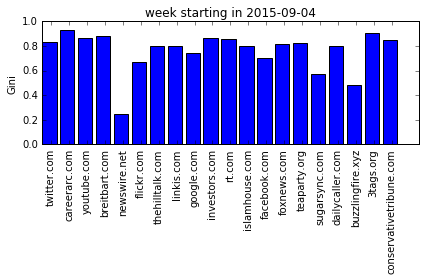

['twitter.com', 'careerarc.com', 'youtube.com', 'vine.co', 'breitbart.com', 'cnn.com', 'thehilltalk.com', 'newswire.net', 'goharshahi.us', 'linkis.com', 'flickr.com', 'thehill.com', 'foxnews.com', 'google.com', 'facebook.com', 'hannahkwriter.com', 'investors.com', 'theonion.com', 'rt.com', 'tedcruz.org']
[18454, 9467, 8038, 5335, 4970, 2525, 2107, 2011, 1924, 1918, 1880, 1803, 1683, 1660, 1613, 1606, 1502, 1280, 1001, 998]
['gopdebate', 'tcot', 'pjnet', 'isis', 'veterans', 'job', 'islam', 'trump', 'wakeupamerica', 'hiring', 'ccot', 'gop', 'cnndebate', 'careerarc', 'jobs', 'teaparty', 'trump2016', '2a', 'uniteblue', 'istandwithmariam']
[38083, 37888, 16466, 16190, 12232, 8921, 8717, 8127, 7657, 7507, 6876, 6055, 5955, 5046, 4491, 4388, 4297, 4250, 4153, 3932]


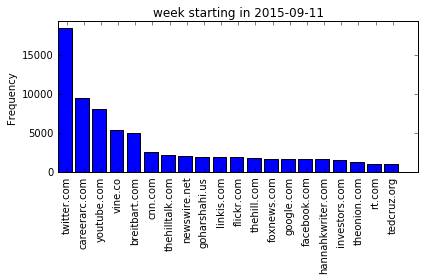

[0.8594204063116566, 0.9303318113154861, 0.8496046402384251, 0.9147548472715397, 0.8618884925220653, 0.9165567756278582, 0.8037274320683185, 0.5215496368038741, 0.5906028076365035, 0.7745334023328181, 0.7282690045974554, 0.8712194393267938, 0.8164094012343039, 0.7950142100635875, 0.7538951829598408, 0.5788334335538184, 0.882983272329217, 0.8294392523364486, 0.8314781136335131, 0.8767422735110757]


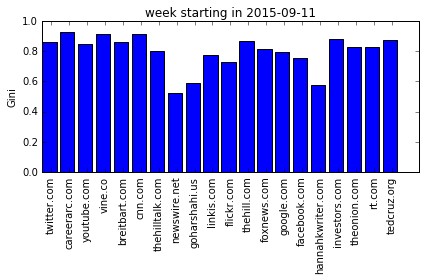

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'twitlonger.com', 'thehilltalk.com', 'dailymail.co.uk', 'linkis.com', 'goharshahi.us', 'tedcruz.org', 'islamhouse.com', 'hannahkwriter.com', 'theblaze.com', 'conscores.org', 'facebook.com', 'google.com', 'foxnews.com', 'buzzlingfire.xyz', 'toginet.com', 'flickr.com']
[13605, 9302, 7321, 6771, 4393, 2307, 2228, 2067, 1799, 1701, 1579, 1547, 1513, 1504, 1489, 1479, 1420, 1403, 1174, 1147]
['tcot', 'isis', 'pjnet', 'veterans', 'islam', 'trump2016', 'wakeupamerica', 'job', 'ccot', 'hiring', 'is', 'defundpp', 'gop', 'trump', 'isil', 'gopdebate', 'daesh', 'muslim', 'careerarc', '2a']
[40819, 17910, 17445, 12643, 11111, 9809, 9607, 8832, 7646, 7536, 7458, 7114, 6972, 6942, 6419, 6385, 5674, 5263, 4846, 4777]


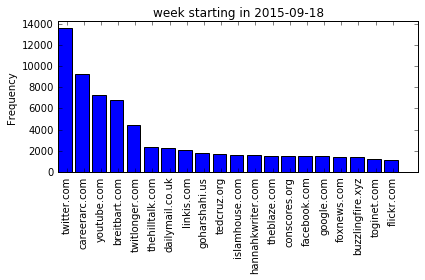

[0.8380051271968256, 0.9296316401050095, 0.8457165625027795, 0.883777353087768, 0.8431912624494374, 0.8283505084819227, 0.9045427958666407, 0.8016333788591887, 0.615167734972136, 0.8855516837816672, 0.7992536778798607, 0.0, 0.9025729264686114, 0.8727765971876836, 0.7694172352910328, 0.7847072095354095, 0.8149326917779288, 0.49151943462897524, 0.36980012429582404, 0.6634636809269162]


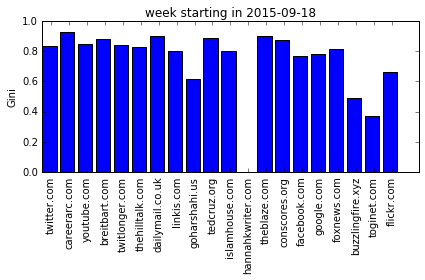

['twitter.com', 'youtube.com', 'breitbart.com', 'tedcruz.org', 'careerarc.com', 'twitlonger.com', 'linkis.com', 'dailymail.co.uk', 'thehilltalk.com', 'americanthinker.com', 'conscores.org', 'vine.co', 'google.com', 'mobypicture.com', 'facebook.com', 'islamhouse.com', 'toginet.com', 'investors.com', 'foxnews.com', 'nytimes.com']
[15223, 7479, 6317, 4223, 4222, 2801, 2344, 2293, 1881, 1569, 1557, 1349, 1326, 1324, 1318, 1311, 1258, 1256, 1209, 1095]
['tcot', 'isis', 'pjnet', 'trump2016', 'islam', 'defundpp', 'ccot', 'wakeupamerica', 'veterans', 'trump', 'cruz2016', 'gop', 'uniteblue', '2a', 'teaparty', 'makeamericagreatagain', 'muslim', 'is', 'syria', 'job']
[39698, 20488, 14902, 12432, 9790, 8874, 8318, 8299, 7669, 7057, 6582, 5960, 5379, 5292, 5107, 4857, 4707, 4547, 4460, 4050]


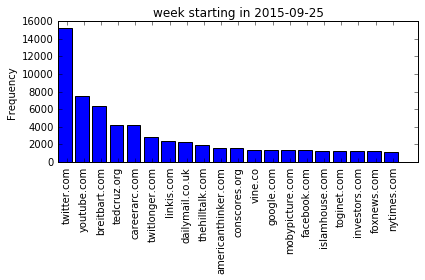

[0.8533128540171268, 0.8585008730442616, 0.872775713481443, 0.9019040626446615, 0.9101274804551247, 0.8231067553149168, 0.8001061927118265, 0.900975616134815, 0.8256810238568274, 0.8612075160671773, 0.8718743004775407, 0.7697085551625159, 0.7695327385411515, 0.691949305454565, 0.7563642268291861, 0.8038367793979531, 0.3491866882821181, 0.8671518063209458, 0.7824315735733859, 0.8210198904353727]


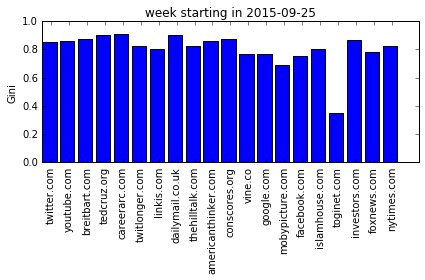

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'tedcruz.org', 'rt.com', 'toginet.com', 'linkis.com', 'facebook.com', 'goharshahi.us', 'actualidad.rt.com', 'conscores.org', 'dailymail.co.uk', 'foxnews.com', 'patriotjournalist.com', 'americanthinker.com', 'investors.com', 'thehilltalk.com', 'ConservativeReport.Org', 'google.com']
[16039, 8251, 6672, 5882, 4528, 3700, 2630, 2414, 2141, 1690, 1647, 1461, 1380, 1361, 1349, 1331, 1280, 1191, 1128, 1068]
['tcot', 'isis', 'pjnet', '2a', 'trump2016', 'veterans', 'islam', 'ccot', 'wakeupamerica', 'trump', 'nra', 'job', 'syria', 'uniteblue', 'gop', 'hiring', 'cruz2016', 'teaparty', 'makeamericagreatagain', 'is']
[41181, 27036, 17346, 13651, 11466, 11361, 8707, 7988, 7538, 6756, 6409, 6353, 6070, 6034, 5699, 5423, 5319, 4826, 4257, 4117]


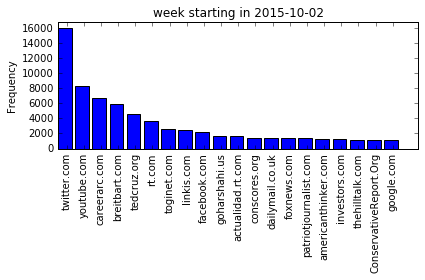

[0.8566474981956141, 0.8682499372553756, 0.9217913911313849, 0.8792695251820104, 0.8980528042398486, 0.9084786463043518, 0.5502194907813872, 0.8032373461167754, 0.8218148891111443, 0.7013868197353431, 0.8299029353292012, 0.8542692434100365, 0.853068145800317, 0.8146591254152238, 0.8837484676250975, 0.8873823495235882, 0.8719821927972148, 0.8129624566299593, 0.8108101861125921, 0.7582948760032697]


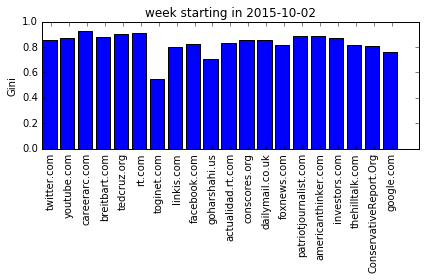

['twitter.com', 'careerarc.com', 'youtube.com', 'tedcruz.org', 'breitbart.com', 'linkis.com', 'rt.com', 'cnn.com', 'twitlonger.com', 'flickr.com', 'dailymail.co.uk', 'facebook.com', 'vine.co', 'conscores.org', 'investors.com', 'foxnews.com', 'google.com', 'toginet.com', 'americanthinker.com', 'actualidad.rt.com']
[18248, 8173, 7788, 4744, 4652, 2131, 1744, 1706, 1591, 1549, 1443, 1437, 1412, 1410, 1383, 1329, 1195, 1149, 1055, 1017]
['tcot', 'isis', 'pjnet', 'trump2016', 'veterans', 'islam', '2a', 'job', 'trump', 'wakeupamerica', 'ccot', 'hiring', 'uniteblue', 'gop', 'makeamericagreatagain', 'teaparty', 'cruz2016', 'nra', 'benghazi', 'jobs']
[38643, 20000, 15743, 14888, 11582, 8562, 8224, 7787, 7692, 7025, 6970, 6703, 6057, 5950, 5775, 4572, 4453, 4353, 4346, 4072]


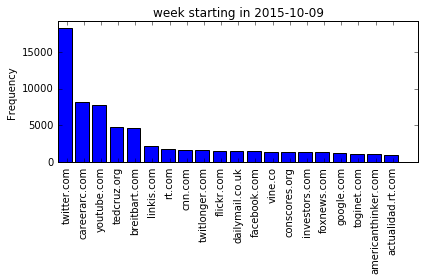

[0.8751091955548036, 0.9284828184514847, 0.8671841430214534, 0.9146025578759915, 0.8510314598572106, 0.7926501662071276, 0.8802898727984344, 0.8547544809380798, 0.8525979437312433, 0.7005120971681829, 0.8531774764495934, 0.7574951500562076, 0.6928594468521521, 0.8608392833128485, 0.8751552427701225, 0.806275887942057, 0.7729632875961275, 0.38267202791897426, 0.8693159752123331, 0.86262189604906]


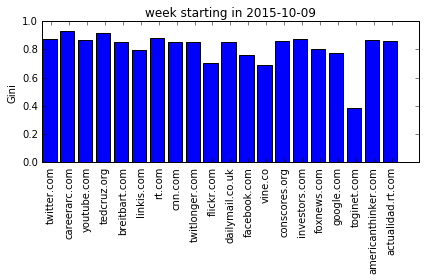

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'whoishussain.org', 'tedcruz.org', 'americanthinker.com', 'linkis.com', 'vine.co', 'foxnews.com', 'rt.com', 'investors.com', 'hannahkwriter.com', 'facebook.com', 'dailymail.co.uk', 'twitlonger.com', 'google.com', 'conscores.org', 'dailycaller.com', 'toginet.com']
[15945, 8102, 7432, 5470, 3932, 2418, 1898, 1771, 1689, 1687, 1490, 1430, 1429, 1331, 1236, 1220, 1190, 1183, 1183, 1173]
['tcot', 'pjnet', 'isis', 'veterans', 'benghazi', 'islam', 'trump2016', '2a', 'job', 'ccot', 'trump', 'hiring', 'wakeupamerica', 'gop', 'makeamericagreatagain', 'news', 'teaparty', 'uniteblue', 'nra', 'istandwithmariam']
[41524, 18624, 16120, 11643, 11426, 11223, 10828, 8487, 7700, 7232, 6839, 6568, 6439, 5927, 5185, 5064, 4771, 4599, 4386, 3932]


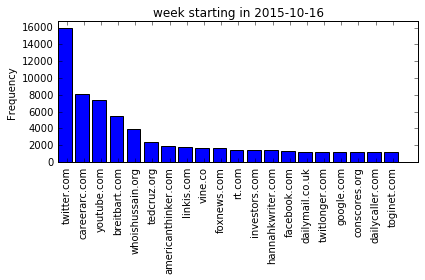

[0.8591500014789785, 0.929311778953992, 0.8661224260434305, 0.8631892582266517, 0.6672525503170664, 0.8834425991233237, 0.912199008196861, 0.7901642064663353, 0.8224762207225089, 0.8145676570820289, 0.8486061145810141, 0.8749945474372955, 0.0, 0.7656781166637499, 0.8278278688524591, 0.861443607502647, 0.7528334314082625, 0.8563807387077335, 0.8160260696271966, 0.4501371473354232]


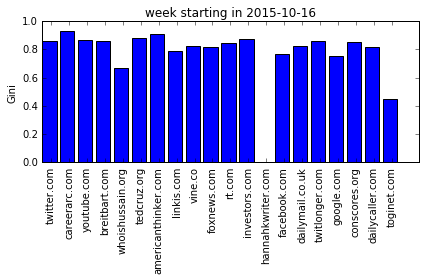

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'vine.co', 'thehill.com', 'goharshahi.us', 'cnn.com', 'linkis.com', 'dailycaller.com', 'americanthinker.com', 'thehilltalk.com', 'facebook.com', 'foxnews.com', 'amp.twimg.com', 'tedcruz.org', 'twitlonger.com', 'whoishussain.org', 'toginet.com', 'younusalgohar.org']
[23142, 9548, 8127, 5628, 3370, 2402, 2141, 2100, 2080, 2076, 2048, 2035, 1798, 1777, 1661, 1586, 1448, 1354, 1345, 1287]
['tcot', 'gopdebate', 'isis', 'pjnet', 'trump2016', 'veterans', 'benghazi', 'islam', 'trump', 'ccot', '2a', 'job', 'makeamericagreatagain', 'gop', 'hiring', 'wakeupamerica', 'cruzcrew', 'teaparty', 'cnbcgopdebate', 'jobs']
[41397, 30670, 18938, 18878, 12936, 12457, 12162, 9536, 9304, 8318, 7955, 7676, 7620, 6922, 6562, 6541, 5901, 4771, 4162, 3965]


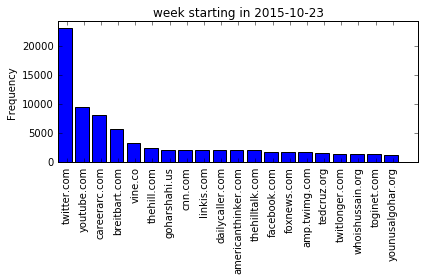

[0.8773822665197597, 0.8744506559962248, 0.9278199812762804, 0.8725916566673033, 0.8305574105114347, 0.8635854431392632, 0.6692714845378012, 0.8715471036899608, 0.7881460182893392, 0.86657538511796, 0.8711697620700013, 0.8354782912874745, 0.7893097581126736, 0.8273762399292134, 0.8063819831242736, 0.8576872798174285, 0.8212620491880184, 0.5594103107344632, 0.42902229030213396, 0.5241815087410239]


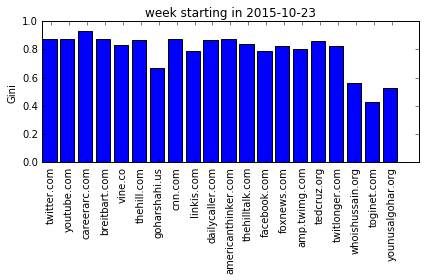

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'linkis.com', 'twitlonger.com', 'thehilltalk.com', 'goharshahi.us', 'toginet.com', 'foxnews.com', 'whoishussain.org', 'vine.co', 'facebook.com', 'google.com', 'investors.com', '3tags.org', 'americanthinker.com', 'cnn.com', 'conscores.org', 'dailycaller.com']
[15564, 11628, 10081, 6477, 2058, 2052, 2045, 2042, 1574, 1558, 1481, 1456, 1448, 1228, 1219, 1196, 1178, 1136, 1098, 976]
['tcot', 'isis', 'veterans', 'pjnet', 'job', 'islam', 'hiring', 'trump2016', '2a', 'ccot', 'is', 'wakeupamerica', 'trump', 'gop', 'taliban', 'makeamericagreatagain', 'gopdebate', 'jobs', 'isil', 'careerarc']
[39719, 21550, 16954, 16506, 11057, 10022, 9099, 9042, 7686, 7546, 7210, 7077, 6980, 6675, 6411, 6304, 5702, 5624, 5592, 5221]


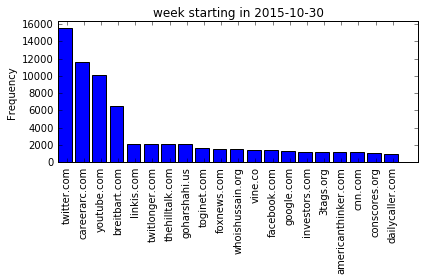

[0.8467863584182876, 0.926825825911735, 0.8995626170381608, 0.8718170539302857, 0.7908162043981999, 0.8436896650666511, 0.8133971314202777, 0.5459264743372598, 0.6098351359014866, 0.7949924767479704, 0.5188198544479767, 0.8175610153607953, 0.7632348703110193, 0.7825442447647879, 0.8688335100742312, 0.8481557936650096, 0.8395080278183223, 0.8197906281156531, 0.8515672536986492, 0.7908881541443393]


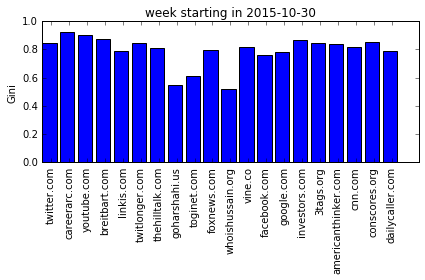

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'amp.twimg.com', 'tedcruz.org', 'facebook.com', 'thehilltalk.com', 'linkis.com', 'vine.co', 'toginet.com', 'cnn.com', 'foxbusiness.com', 'thehill.com', 'google.com', 'americanthinker.com', 'foxnews.com', 'nytimes.com', '3tags.org', 'instagram.com']
[25489, 11457, 10524, 5366, 2302, 2249, 2133, 2029, 2018, 1846, 1823, 1790, 1485, 1464, 1454, 1363, 1358, 1348, 1251, 1242]
['tcot', 'gopdebate', 'veterans', 'isis', 'pjnet', 'job', 'trump2016', 'trump', 'hiring', 'islam', 'makeamericagreatagain', 'cruzcrew', 'ccot', '2a', 'gop', 'wakeupamerica', 'jobs', 'careerarc', 'uniteblue', 'is']
[37664, 36967, 23286, 16980, 15939, 10904, 10773, 9806, 8889, 8748, 7185, 6760, 6223, 6065, 5788, 5777, 5336, 5170, 4814, 4785]


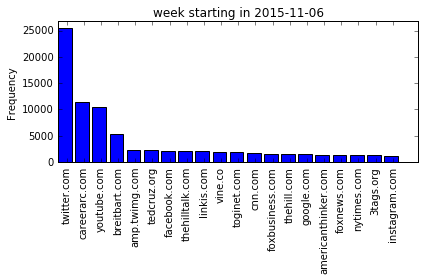

[0.892049615101582, 0.9272839858611238, 0.8802118660523938, 0.8702331848193956, 0.8877405780060648, 0.8621194410035417, 0.7845257562366599, 0.8056254995571493, 0.7808854194514249, 0.8004329652297322, 0.7035778109397741, 0.8460121790149557, 0.8819836635238055, 0.8313803660712319, 0.7914582149327485, 0.8305364259646658, 0.7918315677459468, 0.8175707763206808, 0.8314044773685559, 0.6352136160067017]


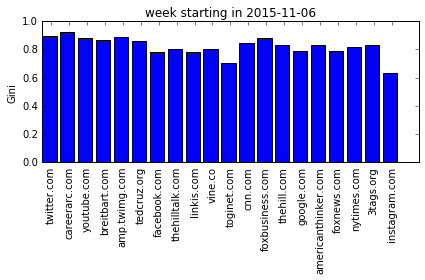

['twitter.com', 'careerarc.com', 'youtube.com', 'cnn.com', 'breitbart.com', 'rt.com', 'actualidad.rt.com', 'linkis.com', 'facebook.com', 'foxnews.com', 'dailymail.co.uk', 'investors.com', 'google.com', 'washingtonpost.com', 'thehilltalk.com', 'toginet.com', 'amp.twimg.com', 'nytimes.com', 'conscores.org', 'infowars.com']
[31911, 12011, 11781, 9204, 9005, 5379, 3351, 2987, 2728, 1929, 1856, 1535, 1533, 1495, 1460, 1408, 1402, 1392, 1227, 1196]
['isis', 'tcot', 'pjnet', 'veterans', 'parisattacks', 'islam', 'trump2016', 'job', 'paris', 'hiring', 'wakeupamerica', 'trump', '2a', 'ccot', 'makeamericagreatagain', 'gop', 'jobs', 'careerarc', 'muslim', 'syria']
[78643, 52119, 19403, 17377, 16752, 11911, 11556, 11444, 11420, 9508, 8920, 8739, 8426, 8297, 7187, 6944, 5606, 5590, 5427, 5353]


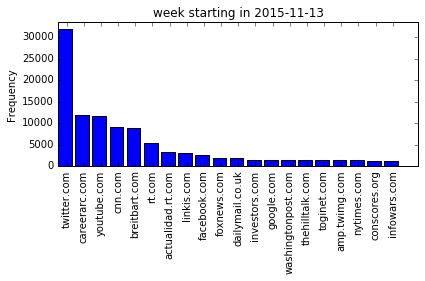

[0.881817800299073, 0.9274810238894883, 0.8730235756348259, 0.9527856086932406, 0.8883918815512657, 0.9151227213770984, 0.9251857884556652, 0.8101222997679401, 0.8133145134814428, 0.8187292115045979, 0.8276432228509836, 0.8695574309955004, 0.7766959921798632, 0.8042809920085318, 0.7799446552841146, 0.8322053423572612, 0.8090273931122091, 0.807208886668076, 0.8504585870105733, 0.8274863387978142]


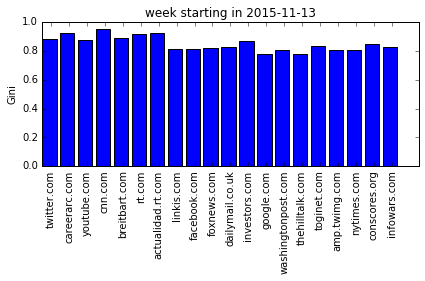

['twitter.com', 'careerarc.com', 'youtube.com', 'breitbart.com', 'rt.com', 'hannahkwriter.com', 'linkis.com', 'investors.com', 'washingtonpost.com', 'facebook.com', 'freedomdaily.com', 'PatriotJournalist.com', 'americanthinker.com', 'google.com', 'toginet.com', 'actualidad.rt.com', 'conscores.org', 'foxnews.com', 'thehilltalk.com', 'dailymail.co.uk']
[18935, 9611, 9301, 5587, 4639, 2445, 2286, 1617, 1607, 1514, 1417, 1417, 1409, 1391, 1227, 1151, 1087, 1083, 1080, 1072]
['isis', 'tcot', 'pjnet', 'veterans', 'islam', 'job', 'trump', 'trump2016', 'hiring', 'ccot', '2a', 'makeamericagreatagain', 'wakeupamerica', 'gop', 'careerarc', 'jobs', 'muslim', 'syria', 'istandwithmariam', 'tgdn']
[42022, 36932, 18568, 13845, 9419, 9110, 8663, 8407, 7705, 5932, 5528, 4984, 4944, 4596, 4560, 4545, 4368, 3991, 3932, 3766]


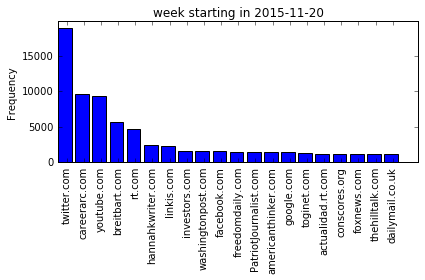

[0.8520333457055009, 0.9262072744655512, 0.8670846829741434, 0.8534601172886751, 0.907474763141908, 0.25020461055790477, 0.8066036969822459, 0.8567696353217131, 0.82133423590197, 0.7387601854104852, 0.8939602596891599, 0.8750455373406193, 0.8677835288352578, 0.7726642389946993, 0.788438671910729, 0.8892938496583144, 0.8337219635389804, 0.789588463238799, 0.7757182043801977, 0.8073360856526772]


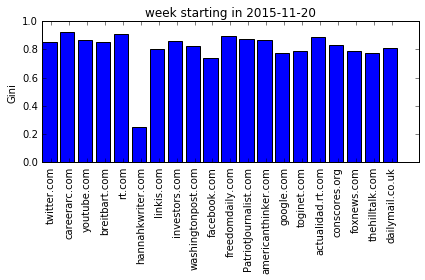

['twitter.com', 'youtube.com', 'careerarc.com', 'PatriotJournalist.com', 'breitbart.com', 'rt.com', 'linkis.com', 'actualidad.rt.com', 'toginet.com', 'cnn.com', 'google.com', 'townhall.com', 'conscores.org', 'foxnews.com', 'facebook.com', 'mobypicture.com', 'twitlonger.com', 'investors.com', 'dropbox.com', 'ec.libsyn.com']
[23583, 11893, 9295, 5780, 5227, 3279, 3031, 1872, 1723, 1510, 1510, 1338, 1321, 1306, 1290, 1172, 1171, 1134, 1052, 1011]
['isis', 'tcot', 'pjnet', 'veterans', 'trump2016', 'islam', 'job', 'trump', '2a', 'hiring', 'isil', 'stopesea', 'syria', 'daesh', 'wakeupamerica', 'ccot', 'gop', 'makeamericagreatagain', 'is', 'nra']
[43065, 36906, 20935, 14532, 10454, 9160, 8778, 8314, 7890, 7461, 7131, 6770, 6431, 6388, 6251, 6246, 5672, 5542, 5209, 4499]


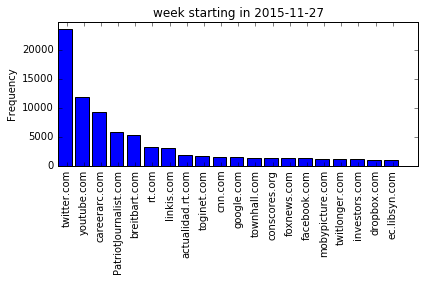

[0.867062620451369, 0.8985886434547018, 0.9309847349540621, 0.9156899825906187, 0.8527039483791673, 0.8905753546877633, 0.8197515339531909, 0.8786471526409607, 0.8274295774647887, 0.8293794004677548, 0.7757871672205383, 0.8041664236414893, 0.857292263161868, 0.7931202470258727, 0.7604426812192583, 0.5351449003692804, 0.8575550268855932, 0.8607816269144578, 0.5792187443881766, 0.8388993948562784]


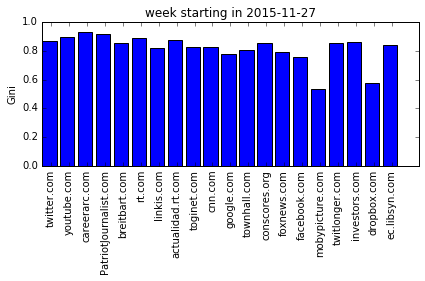

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'linkis.com', 'cnn.com', 'foxnews.com', 'toginet.com', 'rt.com', 'infowars.com', 'investors.com', 'dailymail.co.uk', 'conscores.org', 'townhall.com', 'actualidad.rt.com', 'americanthinker.com', 'thehill.com', 'google.com', 'washingtonpost.com']
[31132, 10998, 9214, 8177, 4104, 3348, 2133, 2126, 1779, 1718, 1428, 1416, 1358, 1274, 1229, 1161, 1135, 1023, 1013, 989]
['tcot', 'isis', 'trump', 'pjnet', '2a', 'veterans', 'trump2016', 'wakeupamerica', 'islam', 'job', 'nra', 'ccot', 'makeamericagreatagain', 'hiring', 'gop', 'p2', 'syria', 'muslim', 'jobs', 'careerarc']
[46718, 35194, 19491, 16923, 15568, 14565, 12937, 10236, 8768, 8750, 8160, 7873, 7571, 7412, 6623, 4844, 4649, 4539, 4410, 4095]


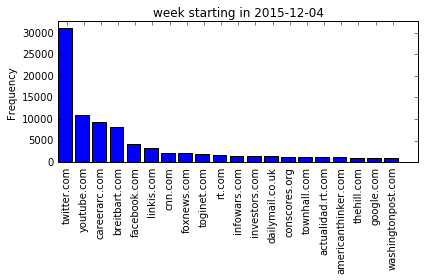

[0.8799025417281177, 0.8717901489004919, 0.9328615523036522, 0.8864764800854537, 0.8596149278303229, 0.8218712608064397, 0.8454045708400867, 0.8195638029305364, 0.7921955171482582, 0.8402904254183254, 0.7670034235785848, 0.8635849536154531, 0.8113666496261477, 0.8519661705208784, 0.7659720688683628, 0.8647193699531452, 0.8296071029082774, 0.7477796438117176, 0.730076257297268, 0.712457832086579]


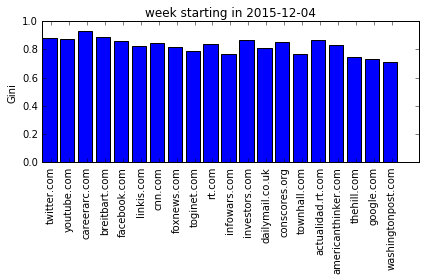

['twitter.com', 'youtube.com', 'careerarc.com', 'cnn.com', 'breitbart.com', 'facebook.com', 'amp.twimg.com', 'linkis.com', 'thehill.com', 'toginet.com', 'infowars.com', 'foxnews.com', 'rt.com', 'washingtonpost.com', 'quora.com', 'vine.co', 'tedcruz.org', 'nytimes.com', 'investors.com', 'thegatewaypundit.com']
[32963, 11881, 10060, 9007, 7765, 6907, 4316, 2964, 2431, 2255, 2127, 2046, 1872, 1854, 1813, 1762, 1680, 1630, 1626, 1339]
['gopdebate', 'tcot', 'isis', 'trump', 'trump2016', 'pjnet', 'veterans', 'makeamericagreatagain', '2a', 'job', 'wakeupamerica', 'hiring', 'islam', 'ccot', 'gop', 'cruzcrew', 'nra', 'jobs', 'muslim', 'p2']
[53738, 44066, 27023, 19854, 18001, 16883, 15370, 11107, 10332, 9531, 8637, 8286, 7789, 7513, 6922, 5708, 5140, 4964, 4417, 4278]


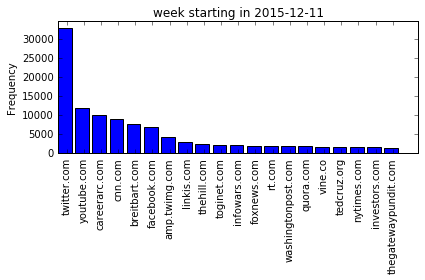

[0.8815315708265571, 0.8814009386792392, 0.9368701857723669, 0.9417074556034648, 0.8869288515171213, 0.9085489665578377, 0.9129328618158375, 0.8139480813975731, 0.8261314374891625, 0.7744990163715781, 0.6898538373931135, 0.8248441829227855, 0.8653941838964532, 0.8176471481273436, 0.8305815446707027, 0.7994909095393317, 0.8703533871362191, 0.8056816043160955, 0.8696614333012923, 0.8341581463482228]


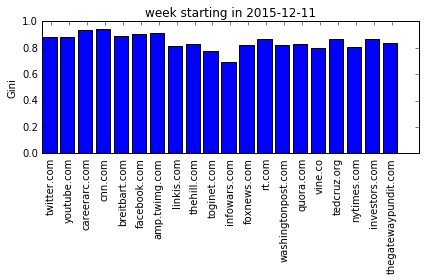

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'infowars.com', 'linkis.com', 'investors.com', 'americanthinker.com', 'cnn.com', 'rt.com', 'toginet.com', 'foxnews.com', 'thehill.com', 'vanityfair.com', 'washingtonpost.com', 'dailycaller.com', 'google.com', 'quora.com', 'dailymail.co.uk']
[21468, 10406, 9274, 7968, 5528, 2549, 2471, 1757, 1406, 1329, 1218, 1140, 1129, 1128, 1079, 1049, 997, 956, 947, 926]
['tcot', 'isis', 'trump2016', 'pjnet', 'veterans', 'trump', '2a', 'job', 'makeamericagreatagain', 'islam', 'ccot', 'hiring', 'wakeupamerica', 'gop', 'muslim', 'cruzcrew', 'jobs', 'gopdebate', 'careerarc', 'nra']
[38360, 21688, 15170, 14920, 13259, 11991, 9530, 8775, 8723, 8314, 7696, 7524, 7300, 6459, 5111, 4852, 4528, 4203, 4096, 4039]


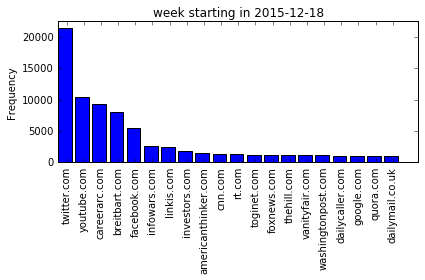

[0.8685271082920346, 0.8758670790298657, 0.9326590181703562, 0.8768057640711026, 0.9001425495173818, 0.7392076884394032, 0.7993075911967243, 0.8618157102631323, 0.864300924710481, 0.805413675612995, 0.8279493805890558, 0.6487362637362637, 0.7667539227969692, 0.7669352332385386, 0.8804838048380483, 0.7667885409497591, 0.7885293489324805, 0.6904860095727264, 0.8770463253221874, 0.7814352284836963]


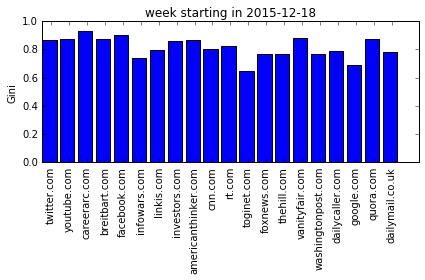

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'investors.com', 'linkis.com', 'vanityfair.com', 'rt.com', 'infowars.com', 'americanthinker.com', 'fallenangelthemovie.org', 'foxnews.com', 'cnn.com', 'twitlonger.com', 'google.com', 'quora.com', 'dailycaller.com', 'thehilltalk.com', 'conscores.org']
[19331, 7767, 7162, 5588, 2853, 1982, 1942, 1456, 1442, 1133, 1085, 975, 955, 941, 898, 895, 846, 839, 760, 739]
['tcot', 'isis', 'trump2016', 'pjnet', 'veterans', 'trump', 'makeamericagreatagain', '2a', 'islam', 'job', 'ccot', 'hiring', 'wakeupamerica', 'istandwithmariam', 'nra', 'jobs', 'gop', 'realdonaldtrump', 'careerarc', 'teaparty']
[29510, 20518, 12902, 12539, 10032, 9872, 7718, 7473, 6858, 6829, 5916, 5797, 5339, 3932, 3884, 3483, 3458, 3418, 3267, 3126]


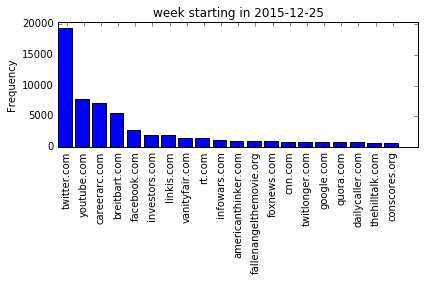

[0.8716618980484812, 0.8538630014033587, 0.9260769071877378, 0.8728591600257293, 0.8501667305233037, 0.8530440385636304, 0.7777446695801881, 0.851670900918507, 0.8746804346920931, 0.6846787218545144, 0.8460521499472472, 0.5708294859956909, 0.7880041908007628, 0.7980880608471147, 0.8114464289363821, 0.6826457307471944, 0.0, 0.7980812188556046, 0.7652315651465221, 0.8318938442211056]


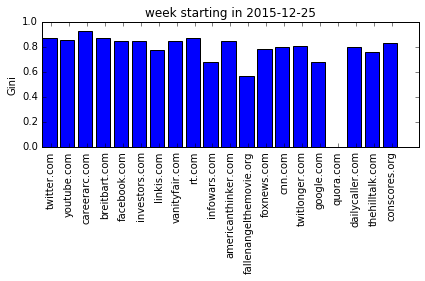

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'infowars.com', 'linkis.com', 'washingtonpost.com', 'investors.com', 'facebook.com', 'vanityfair.com', 'americanthinker.com', 'tedcruz.org', 'dailycaller.com', 'thehill.com', 'foxnews.com', 'rt.com', 'cnn.com', 'quora.com', 'wnd.com', 'vine.co']
[24764, 13088, 8241, 7748, 3070, 2312, 2303, 2148, 1846, 1636, 1403, 1386, 1338, 1235, 1219, 1213, 1107, 899, 888, 831]
['tcot', '2a', 'pjnet', 'isis', 'trump2016', 'trump', 'veterans', 'nra', 'islam', 'wakeupamerica', 'job', 'ccot', 'makeamericagreatagain', 'hiring', 'gop', 'cruzcrew', 'p2', 'jobs', 'rt', 'saudiarabia']
[41001, 21043, 18581, 16097, 14347, 14070, 12033, 8749, 8610, 7826, 7816, 7606, 6703, 6688, 5423, 4572, 4401, 4053, 4049, 4032]


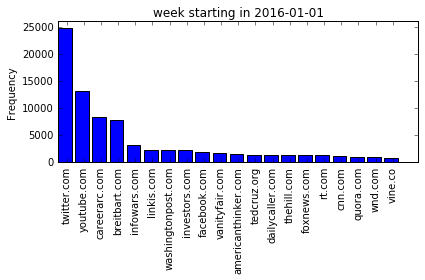

[0.8717639515875241, 0.9172309666703246, 0.929977836983286, 0.8855125924450481, 0.8196231158690674, 0.7965100970748324, 0.8759302057613169, 0.885249438978077, 0.7928954805478953, 0.9326741996233522, 0.8443845625933551, 0.8724982397643307, 0.8177133681124222, 0.8236145152505446, 0.7965144927536232, 0.8554890691021705, 0.776443617516114, 0.0, 0.863353061331378, 0.7930833968166676]


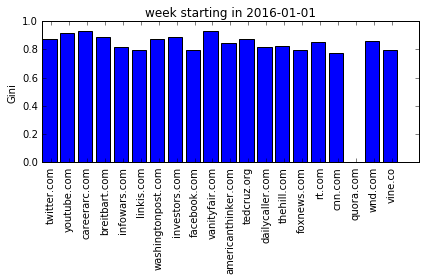

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'infowars.com', 'linkis.com', 'investors.com', 'facebook.com', 'foxnews.com', 'americanthinker.com', 'vanityfair.com', 'washingtonpost.com', 'tedcruz.org', 'cnn.com', 'thehill.com', 'dailycaller.com', 'conscores.org', 'dailymail.co.uk', 'nytimes.com', 'humblebundle.com']
[28376, 16872, 9192, 9066, 3478, 2944, 2314, 1966, 1839, 1806, 1743, 1739, 1655, 1653, 1427, 1299, 1059, 1038, 1019, 969]
['tcot', 'pjnet', 'isis', 'trump', '2a', 'trump2016', 'veterans', 'islam', 'job', 'ccot', 'wakeupamerica', 'hiring', 'nra', 'gop', 'makeamericagreatagain', 'cruzcrew', 'gopdebate', 'jobs', 'teaparty', 'careerarc']
[45398, 18406, 17373, 16744, 16402, 15518, 13240, 13219, 8783, 8204, 8091, 7458, 7150, 6968, 6338, 5944, 5179, 4551, 4534, 4385]


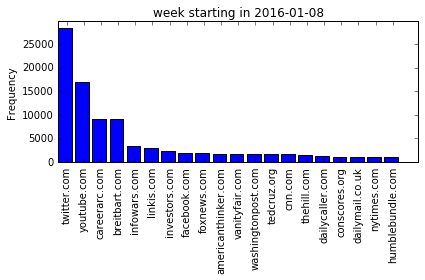

[0.8769262197651476, 0.8911971204540072, 0.9340274914398585, 0.8867671462554814, 0.7388401057574033, 0.8080198192926479, 0.8653945882202505, 0.7885543362112414, 0.7989836025302463, 0.879642470715529, 0.8947398513436249, 0.7937249557924109, 0.8462879422997591, 0.8149237466384659, 0.7803227246116848, 0.7834283201647044, 0.8458995339296492, 0.743743129257292, 0.7676331810549422, 0.0]


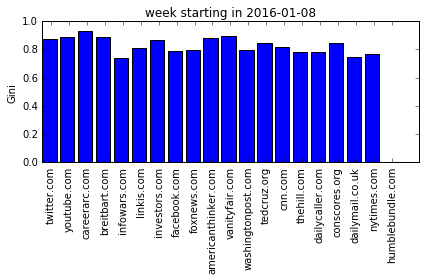

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'amp.twimg.com', 'linkis.com', 'investors.com', 'cnn.com', 'vine.co', 'tedcruz.org', 'americanthinker.com', 'infowars.com', 'foxnews.com', 'thehill.com', 'vanityfair.com', 'nytimes.com', 'politico.com', 'washingtonpost.com', 'dailycaller.com']
[35064, 13423, 8545, 7606, 5569, 4223, 2898, 2602, 2505, 2201, 2155, 2112, 1930, 1816, 1773, 1573, 1428, 1277, 1264, 1229]
['tcot', 'gopdebate', 'trump2016', 'pjnet', 'trump', 'isis', 'veterans', '2a', 'makeamericagreatagain', 'cruzcrew', 'ccot', 'job', 'wakeupamerica', 'hiring', 'gop', 'benghazi', 'islam', 'trumptrain', 'tedcruz', 'nra']
[43993, 36344, 22273, 18226, 17915, 17322, 11341, 10421, 9123, 9021, 8690, 8079, 7269, 6797, 6654, 6510, 6355, 6121, 4987, 4656]


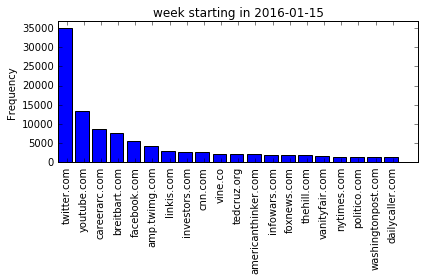

[0.8876517379775624, 0.8858577630261457, 0.9290007874534512, 0.8797776300844623, 0.8870258138941036, 0.866597872411826, 0.8220198552137074, 0.8725718725718725, 0.8675376954905674, 0.8408250703880524, 0.8672424217812311, 0.8662481892805408, 0.7218327470225707, 0.7948138006571741, 0.8362602541596281, 0.9204046424090339, 0.8213702598853411, 0.7871241637250813, 0.785160642685686, 0.8094848991016207]


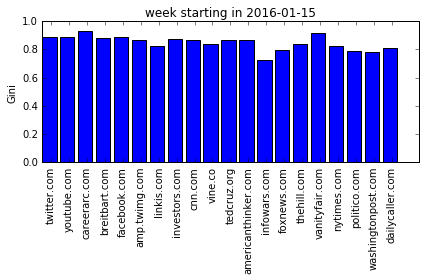

['twitter.com', 'youtube.com', 'breitbart.com', 'careerarc.com', 'facebook.com', 'linkis.com', 'americanthinker.com', 'tedcruz.org', 'donaldjtrump.com', 'm.soundcloud.com', 'investors.com', 'vanityfair.com', 'washingtonpost.com', 'foxnews.com', 'infowars.com', 'vine.co', 'match80.com', 'mediaite.com', 'instagram.com', 'ebay.com']
[36306, 15664, 8719, 7908, 7148, 2942, 2447, 2420, 2411, 2338, 2110, 1833, 1738, 1562, 1543, 1361, 1267, 1260, 1259, 1170]
['tcot', 'trump2016', 'trump', 'pjnet', 'isis', 'makeamericagreatagain', 'veterans', 'cruzcrew', 'gopdebate', '2a', 'ccot', 'trumptrain', 'islam', 'wakeupamerica', 'iacaucus', 'job', 'hiring', 'gop', 'tedcruz', 'teaparty']
[43836, 35157, 22856, 17650, 16439, 13081, 11497, 10530, 9865, 8956, 8773, 8240, 8146, 7929, 7668, 7533, 6410, 5963, 4541, 4447]


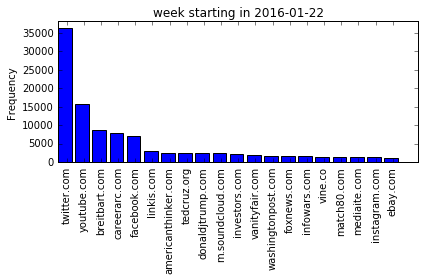

[0.8905173931806232, 0.8847520887226299, 0.8902541718525271, 0.9296510773363666, 0.9031123710126732, 0.805423334321134, 0.8575011399908801, 0.8936814661452342, 0.9200828786218717, 0.8513791773290086, 0.8769577423167849, 0.9019762845849802, 0.8235191717371355, 0.8147446426525078, 0.7449088044275025, 0.8415100788325941, 0.3012810559006211, 0.8121419599914224, 0.6313227674691682, 0.7747542119351283]


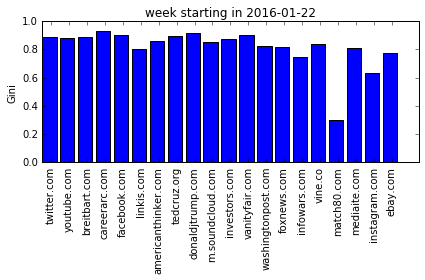

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'amp.twimg.com', 'linkis.com', 'donaldjtrump.com', 'thehill.com', 'vine.co', 'infowars.com', 'tedcruz.org', 'investors.com', 'americanthinker.com', 'cnn.com', 'vanityfair.com', 'foxnews.com', 'nytimes.com', 'GoAngryHornet.com', 'washingtonpost.com']
[44126, 16434, 8703, 5815, 4935, 4650, 3084, 2690, 2397, 2395, 2233, 2200, 2110, 1944, 1894, 1678, 1623, 1554, 1476, 1420]
['tcot', 'gopdebate', 'trump2016', 'trump', 'pjnet', 'isis', 'cruzcrew', 'veterans', 'iacaucus', 'makeamericagreatagain', '2a', 'ccot', 'trumptrain', 'iowacaucus', 'job', 'tedcruz', 'wakeupamerica', 'hiring', 'iowa', 'cruz']
[42666, 35890, 27929, 25694, 17314, 14228, 13168, 12533, 12383, 11924, 10016, 9926, 9290, 9148, 8269, 7963, 7755, 7090, 7067, 7048]


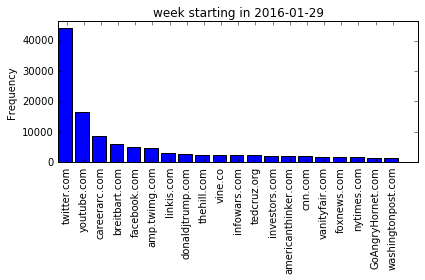

[0.9084946189028503, 0.8938795804816425, 0.930138945543142, 0.8664694849485746, 0.8673169154357555, 0.8851494545186496, 0.8115568151492418, 0.8908309012116388, 0.8560189095003737, 0.8662154122680439, 0.6789019940384418, 0.8683129965452663, 0.8445125636818928, 0.8693224217085983, 0.8494694995550298, 0.9203440927283123, 0.8265808086648165, 0.8313304328236321, 0.461573569207157, 0.8110082648686306]


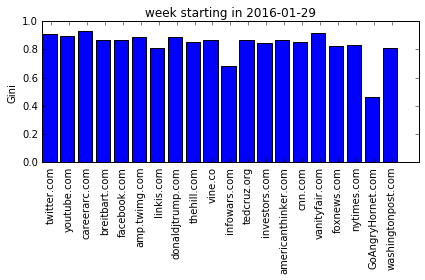

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'amp.twimg.com', 'vine.co', 'linkis.com', 'tedcruz.org', 'thehill.com', 'facebook.com', 'cnn.com', 'americanthinker.com', 'ebay.com', 'investors.com', 'GoAngryHornet.com', 'foxnews.com', 'vanityfair.com', 'abcnews.go.com', 'mobypicture.com', 'newsninja2012.com']
[47558, 16758, 8420, 7950, 6158, 4015, 3250, 2939, 2828, 2698, 2419, 1950, 1815, 1771, 1713, 1594, 1554, 1401, 1375, 1336]
['gopdebate', 'tcot', 'trump2016', 'trump', 'isis', 'pjnet', 'cruzcrew', 'nhprimary', 'veterans', '2a', 'makeamericagreatagain', 'trumptrain', 'ccot', 'islam', 'job', 'gop', 'hiring', 'wakeupamerica', 'tedcruz', 'fitn']
[48597, 44306, 27444, 19597, 18362, 18012, 15737, 13433, 11329, 9822, 9354, 9135, 9127, 8642, 7973, 7264, 6891, 6683, 6164, 5769]


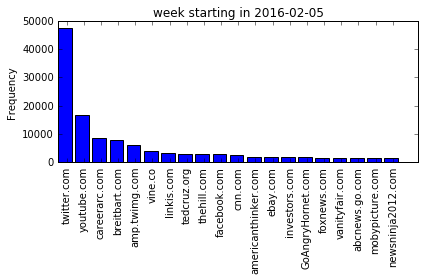

[0.9096027491487576, 0.9084032643773687, 0.9294685553627314, 0.8809894464923052, 0.9036007054673721, 0.8734251931899385, 0.8158255678747482, 0.8685867537313433, 0.8498623150760748, 0.8120069805261986, 0.8472739051772495, 0.8637112663442593, 0.8144728960766696, 0.8583110590360417, 0.4821064944769267, 0.7988335704472004, 0.870978378633002, 0.8768709943141864, 0.6917054627409691, 0.7879691603829535]


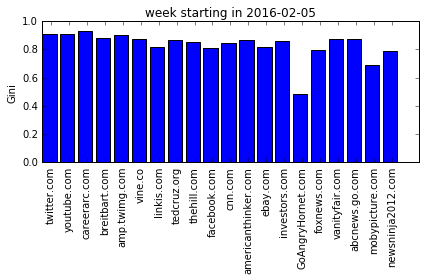

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'amp.twimg.com', 'linkis.com', 'facebook.com', 'tedcruz.org', 'vine.co', 'americanthinker.com', 'thehill.com', 'therightscoop.com', 'cnn.com', 'cbsnews.com', 'investors.com', 'ebay.com', 'GoAngryHornet.com', 'washingtonpost.com', 'dailycaller.com', 'foxnews.com']
[54714, 15328, 8533, 6423, 4415, 3066, 3040, 2672, 2432, 2290, 2112, 1788, 1704, 1699, 1694, 1668, 1623, 1396, 1363, 1362]
['tcot', 'gopdebate', 'trump2016', 'trump', 'scprimary', 'pjnet', 'cruzcrew', 'isis', 'veterans', 'trumptrain', 'makeamericagreatagain', '2a', 'ccot', 'gop', 'job', 'tedcruz', 'hiring', 'votetrumpsc', 'wakeupamerica', 'islam']
[42339, 38161, 30786, 24891, 23816, 17910, 17309, 13320, 12245, 11428, 10774, 10237, 9564, 8376, 8097, 7249, 6889, 6360, 6277, 6031]


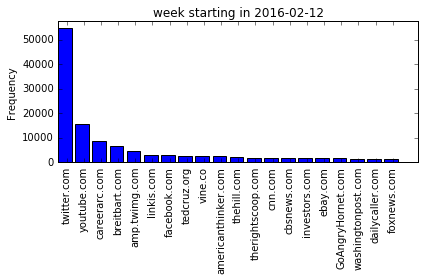

[0.9203949134678392, 0.8939204854565767, 0.9307655583421816, 0.8746466049209247, 0.8444106103983647, 0.8146111208645478, 0.8263744815282393, 0.8588496253028416, 0.851124473895125, 0.8775450980392157, 0.8256128064032016, 0.8320629058082768, 0.7975537173822153, 0.8724126623451903, 0.8553987455197133, 0.8235244376796889, 0.5018207347744912, 0.7963266334245286, 0.7951152215503235, 0.8157304818782706]


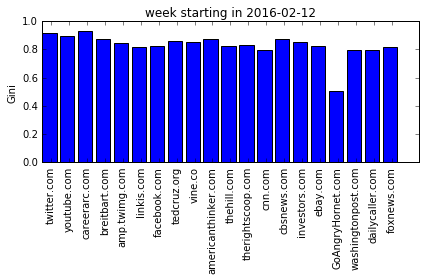

['twitter.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'linkis.com', 'americanthinker.com', 'cnn.com', 'amp.twimg.com', 'investors.com', 'tedcruz.org', 'GoAngryHornet.com', 'vanityfair.com', 'infowars.com', 'donaldjtrump.com', 'ebay.com', 'eventbrite.com', 'therightscoop.com', 'dailycaller.com', 'vine.co']
[58048, 15167, 8088, 7239, 5115, 3190, 2395, 1987, 1883, 1818, 1778, 1692, 1681, 1680, 1669, 1496, 1289, 1151, 1086, 1076]
['tcot', 'trump2016', 'trump', 'pjnet', 'cruzcrew', 'makeamericagreatagain', 'trumptrain', 'veterans', 'isis', 'scprimary', '2a', 'gop', 'ccot', 'job', 'nvcaucus', 'tedcruz', 'hiring', 'wakeupamerica', 'islam', 'gopdebate']
[39391, 38040, 34825, 18332, 15723, 14215, 13998, 12237, 11714, 11197, 10854, 9808, 8736, 7661, 6905, 6899, 6467, 6086, 5416, 5381]


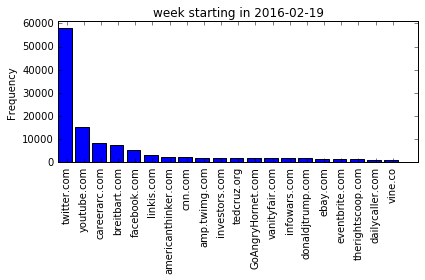

[0.9229879744249525, 0.8889611917134853, 0.9289540015126654, 0.8535793920690481, 0.8778564425724841, 0.8192455173060103, 0.8870921430979023, 0.8140033482246085, 0.7716630892757771, 0.8376220721512314, 0.8467553804355556, 0.5294618678665625, 0.9323172730252376, 0.7027039997717158, 0.9018530809664401, 0.7825689117069528, 0.8756847123745696, 0.798867000102072, 0.7487742014666626, 0.7915677892850969]


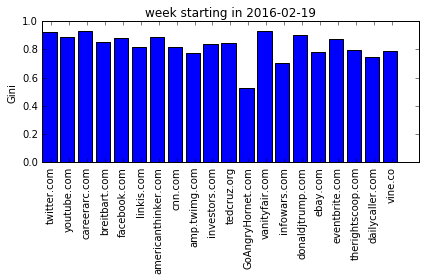

['twitter.com', 'youtube.com', 'facebook.com', 'breitbart.com', 'careerarc.com', 'cnn.com', 'vine.co', 'linkis.com', 'amp.twimg.com', 'infowars.com', 'ebay.com', 'tedcruz.org', 'thehill.com', 'statespoll.com', 'americanthinker.com', 'instagram.com', 'nytimes.com', 'washingtonpost.com', 'politico.com', 'GoAngryHornet.com']
[81603, 21416, 9310, 8550, 7895, 7137, 4785, 4448, 4182, 3102, 2618, 2491, 2482, 2457, 2452, 2259, 2004, 2000, 1929, 1846]
['trump2016', 'trump', 'gopdebate', 'tcot', 'makeamericagreatagain', 'alwaystrump', 'supertuesday', 'trumptrain', 'cruzcrew', 'pjnet', 'gop', 'veterans', '2a', 'isis', 'secprimary', 'nevertrump', 'votetrump', 'ccot', 'job', 'tedcruz']
[54710, 53880, 52958, 38584, 26427, 22496, 20745, 19688, 18169, 18103, 14244, 11086, 10896, 10359, 10039, 10014, 8737, 8009, 7438, 7312]


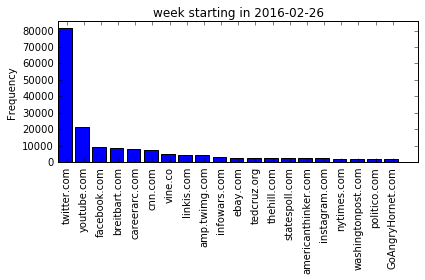

[0.9311202945731883, 0.8983032619619136, 0.9294486844282042, 0.8813760758353023, 0.924674935307361, 0.916271510817293, 0.8941190708727791, 0.8309177258299895, 0.8380370331521371, 0.719689512406477, 0.8335382144515402, 0.885907918301211, 0.8322224287434441, 0.77820421624418, 0.8783126457060046, 0.7599362531554064, 0.8286561817543484, 0.800179450583188, 0.8136018657601392, 0.5345414557724752]


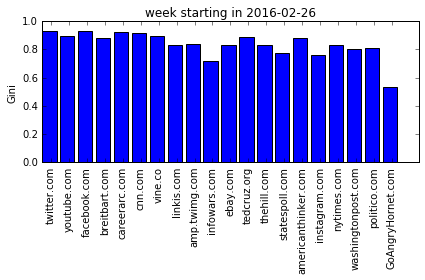

['twitter.com', 'youtube.com', 'amp.twimg.com', 'facebook.com', 'careerarc.com', 'breitbart.com', 'foxnews.com', 'linkis.com', 'tedcruz.org', 'cnn.com', 'donaldjtrump.com', 'vine.co', 'dailycaller.com', 'ebay.com', 'thehill.com', 'infowars.com', 'statespoll.com', 'americanthinker.com', 'washingtonpost.com', 'usatoday.com']
[84607, 24046, 8953, 8536, 8183, 7772, 5363, 5041, 4220, 3931, 3758, 3378, 3365, 2696, 2598, 2588, 2553, 2500, 2079, 2065]
['trump2016', 'gopdebate', 'trump', 'tcot', 'makeamericagreatagain', 'cruzcrew', 'trumptrain', 'pjnet', 'alwaystrump', 'gop', 'cruz', 'isis', 'veterans', 'tedcruz', '2a', 'votetrump', 'ccot', 'nevertrump', 'job', 'maga']
[65003, 56096, 52695, 39405, 27146, 20858, 20365, 17742, 15649, 14416, 13309, 12543, 11713, 10099, 9728, 8995, 8904, 7980, 7682, 6867]


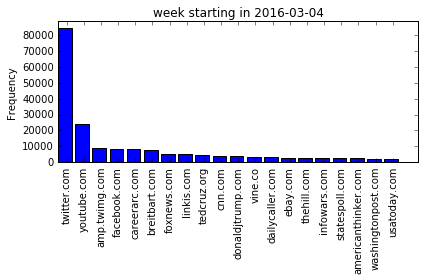

[0.9301807165343559, 0.8978890801198649, 0.8728869744030286, 0.9025461337905812, 0.9251763203011362, 0.8714665761278104, 0.8909480673511132, 0.8404701483863469, 0.9064027280039576, 0.874513579125609, 0.9076337819757224, 0.8729708811728875, 0.8630888198843994, 0.8206931098076736, 0.8112919199353086, 0.7345485304631157, 0.7508265606931709, 0.8787911623522273, 0.8134405748426984, 0.8637051075886362]


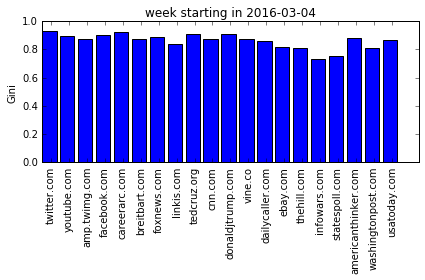

['twitter.com', 'youtube.com', 'breitbart.com', 'careerarc.com', 'amp.twimg.com', 'facebook.com', 'linkis.com', 'cnn.com', 'infowars.com', 'newsninja2012.com', 'vine.co', 'thegatewaypundit.com', 'americanthinker.com', 'ebay.com', 'tedcruz.org', 'nyc.epeak.in', 'statespoll.com', 'foxnews.com', 'rickwells.us', 'politico.com']
[90059, 21670, 9910, 8235, 7317, 5765, 4133, 4049, 3706, 3071, 2897, 2653, 2652, 2530, 2402, 2136, 2112, 2091, 2057, 1858]
['trump2016', 'trump', 'tcot', 'gopdebate', 'trumptrain', 'makeamericagreatagain', 'pjnet', 'cruzcrew', 'alwaystrump', 'isis', 'gop', 'cruz', '2a', 'veterans', 'votetrump', 'ohio', 'tedcruz', 'job', 'ccot', 'ohioprimary']
[67804, 65963, 38152, 35712, 29147, 22943, 16823, 16729, 14996, 13375, 12349, 12159, 11471, 11363, 10604, 8967, 7996, 7830, 7227, 6607]


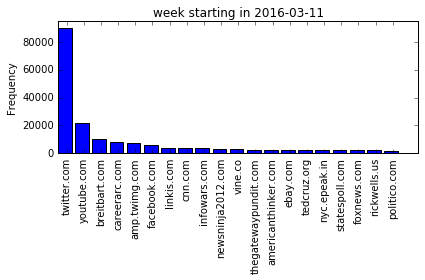

[0.9350643283048679, 0.8948588212342728, 0.8924930245170806, 0.9256983064470014, 0.8407805007818634, 0.9027269247747447, 0.8320154242773143, 0.8933284808272847, 0.7341887923188407, 0.9043589058779017, 0.8656027069403092, 0.844650384668644, 0.8777437612264034, 0.809429368286979, 0.8371704785981117, 0.9062403643177344, 0.7943532851122312, 0.8141202698316722, 0.9270265703544122, 0.8138385146804836]


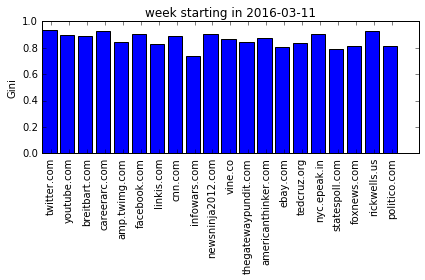

['twitter.com', 'youtube.com', 'breitbart.com', 'careerarc.com', 'amp.twimg.com', 'linkis.com', 'facebook.com', 'ebay.com', 'vine.co', 'infowars.com', 'americanthinker.com', 'newsninja2012.com', 'dailymail.co.uk', 'cnn.com', 'statespoll.com', 'politico.com', 'thegatewaypundit.com', 'nyc.epeak.in', 'washingtonpost.com', 'investors.com']
[71870, 19796, 9763, 7879, 6274, 3764, 3017, 2804, 2752, 2723, 2475, 2363, 2352, 2280, 2159, 2098, 2028, 1847, 1707, 1651]
['trump2016', 'trump', 'tcot', 'trumptrain', 'makeamericagreatagain', 'isis', 'pjnet', 'cruzcrew', 'stopislam', 'veterans', 'gop', '2a', 'azprimary', 'cruz', 'alwaystrump', 'islam', 'job', 'tedcruz', 'votetrump', 'maga']
[55875, 52812, 36173, 23390, 20239, 19478, 16024, 14644, 11671, 11640, 10422, 9597, 9142, 8911, 8144, 7795, 7445, 7104, 6860, 6762]


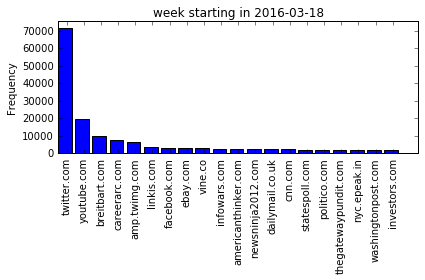

[0.9234526872887939, 0.8896842523899037, 0.8807104806611467, 0.9264408518786933, 0.822283810643599, 0.8188496810207336, 0.8553479367038235, 0.7959301784809996, 0.85468631989017, 0.7293657817109145, 0.8740696706693616, 0.8518729096989966, 0.8171810276119253, 0.8775625256252563, 0.7290320724866964, 0.8282377502926012, 0.8280273918612672, 0.8950391644908616, 0.783164309168982, 0.853415263556339]


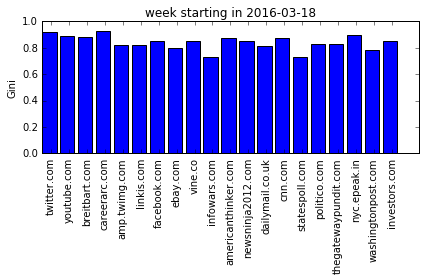

['twitter.com', 'youtube.com', 'amp.twimg.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'linkis.com', 'dailymail.co.uk', 'infowars.com', 'americanthinker.com', 'ebay.com', 'newsninja2012.com', 'politico.com', 'nytimes.com', 'investors.com', 'tedcruz.org', 'washingtonpost.com', 'statespoll.com', 'rickwells.us', 'thehill.com']
[67169, 19057, 8117, 7684, 6648, 5663, 3422, 2706, 2369, 2335, 2302, 1982, 1913, 1864, 1770, 1610, 1602, 1583, 1569, 1531]
['trump2016', 'trump', 'tcot', 'trumptrain', 'isis', 'makeamericagreatagain', 'cruzcrew', 'wiprimary', 'pjnet', 'cruzsexscandal', 'veterans', 'cruz', 'tedcruz', 'gop', 'maga', 'wisconsin', '2a', 'islam', 'job', 'alwaystrump']
[51018, 48515, 35103, 22730, 20266, 19148, 16930, 15656, 15648, 15383, 12452, 12048, 10401, 9586, 9495, 9032, 8341, 7671, 7306, 6869]


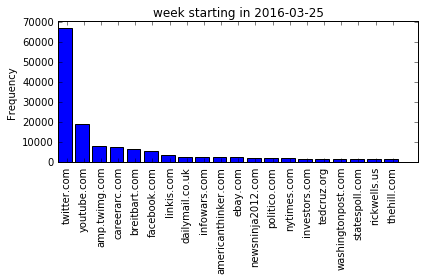

[0.9237921775803, 0.8960511216915332, 0.8689869462011046, 0.924866728037794, 0.8694946432025498, 0.8892883696348352, 0.8316553011199875, 0.8267974457215836, 0.7519119347556088, 0.8726814116928577, 0.7741041489414944, 0.8974248254983558, 0.8468504243347885, 0.8048471321485724, 0.8747178602326716, 0.8714429193170405, 0.7965099772331592, 0.7142424242424242, 0.9252446052807934, 0.8038100724160632]


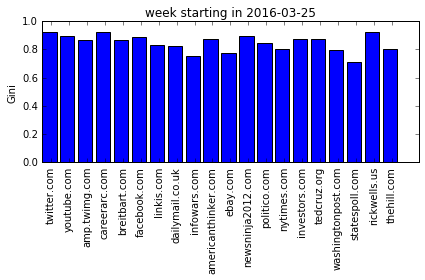

['twitter.com', 'youtube.com', 'amp.twimg.com', 'breitbart.com', 'careerarc.com', 'facebook.com', 'donaldjtrump.com', 'linkis.com', 'newsninja2012.com', 'instagram.com', 'infowars.com', 'rickwells.us', 'vine.co', 'secure.avaaz.org', 'americanthinker.com', 'rsbn.tv', 'thegatewaypundit.com', 'politico.com', 'washingtonpost.com', 'nyc.epeak.in']
[73222, 17345, 14899, 7123, 6996, 5131, 4915, 2940, 2864, 2567, 2391, 2387, 2302, 2161, 2106, 2085, 1807, 1595, 1571, 1481]
['trump2016', 'trump', 'wiprimary', 'tcot', 'trumptrain', 'makeamericagreatagain', 'wisconsin', 'maga', 'cruzcrew', 'isis', 'pjnet', 'veterans', 'cruz', 'gop', '2a', 'wisconsinprimary', 'tedcruz', 'alwaystrump', 'womenfortrump', 'islam']
[68144, 55404, 31473, 31237, 26306, 22390, 20204, 17823, 14712, 14272, 13494, 11458, 11231, 8972, 8828, 8802, 8652, 7126, 6944, 6895]


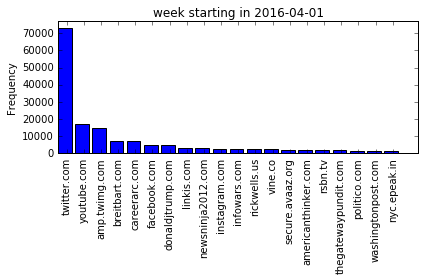

[0.9352681800043695, 0.9010261686016667, 0.8787684489653232, 0.8758737336899934, 0.9252621751558701, 0.887228745921558, 0.9161469965972231, 0.8149294790412869, 0.8971284192887486, 0.8122001053435971, 0.7912277829321982, 0.9398519808445799, 0.8783945779420825, 0.9348946135831382, 0.8765809219995758, 0.8653343135737502, 0.8346941130159764, 0.8219151332774243, 0.7857764749831293, 0.8839922229423202]


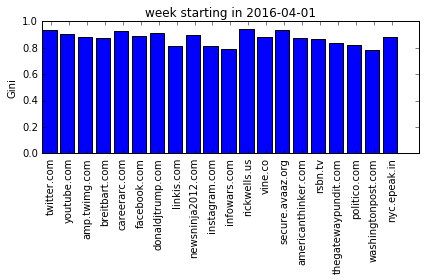

['twitter.com', 'youtube.com', 'amp.twimg.com', 'careerarc.com', 'breitbart.com', 'facebook.com', 'ebay.com', 'donaldjtrump.com', 'linkis.com', 'thegatewaypundit.com', 'newsninja2012.com', 'rickwells.us', 'americanthinker.com', 'infowars.com', 'rsbn.tv', 'politico.com', 'washingtonpost.com', 'investors.com', 'snappytv.com', 'foxnews.com']
[51094, 14404, 8653, 7170, 5895, 3925, 3254, 3232, 2975, 2491, 2208, 2122, 2107, 1987, 1851, 1832, 1567, 1479, 1231, 1214]
['trump2016', 'trump', 'tcot', 'trumptrain', 'cruzcrew', 'pjnet', 'makeamericagreatagain', 'maga', 'nyprimary', 'isis', 'veterans', 'gop', '2a', 'cruz', 'islam', 'job', 'tedcruz', 'ccot', 'hiring', 'ny']
[47712, 40962, 30794, 20965, 14215, 14153, 14014, 14010, 13633, 11779, 11289, 9741, 8228, 7015, 6916, 6823, 6241, 6153, 5706, 5564]


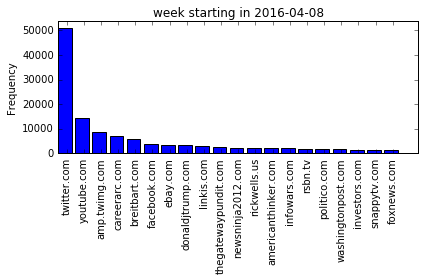

[0.9172760106515928, 0.8865423957788581, 0.8724773829899495, 0.9261333753299441, 0.8647319950838182, 0.8738149470208115, 0.7764706611621478, 0.8938442880026429, 0.8061866244373123, 0.8643487087625019, 0.9170380010411244, 0.9225753715397448, 0.8648288643076388, 0.7287828103943806, 0.8269641382564586, 0.8177871542428504, 0.7898957378162677, 0.8475120986470491, 0.8874401904776394, 0.8239604188240709]


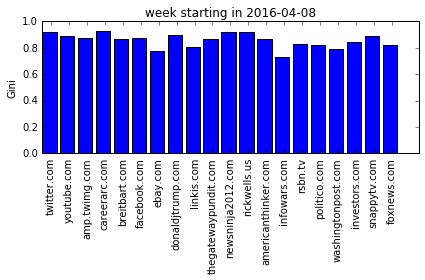

['twitter.com', 'amp.twimg.com', 'youtube.com', 'careerarc.com', 'breitbart.com', 'ebay.com', 'linkis.com', 'donaldjtrump.com', 'facebook.com', 'infowars.com', 'newsninja2012.com', 'americanthinker.com', 'rsbn.tv', 'nypost.com', 'nyc.epeak.in', 'redstate.com', 'therightscoop.com', 'thehill.com', 'politico.com', 'washingtonpost.com']
[51689, 17500, 14913, 7357, 5714, 3105, 2955, 2896, 2894, 1995, 1966, 1955, 1474, 1304, 1287, 1259, 1230, 1206, 1204, 1199]
['trump2016', 'trump', 'tcot', 'trumptrain', 'nyprimary', 'makeamericagreatagain', 'pjnet', 'isis', 'cruzcrew', 'maga', 'veterans', '2a', 'gop', 'islam', 'job', 'cruz', 'tedcruz', 'hiring', 'ccot', 'votetrump']
[47065, 36456, 28253, 20954, 17982, 17915, 13303, 13162, 13160, 12778, 10986, 8303, 7411, 7383, 6935, 6671, 5934, 5753, 5355, 5237]


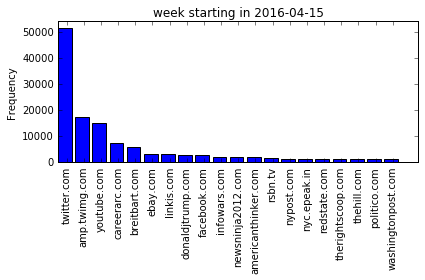

[0.9164256887202458, 0.9147176092667769, 0.8860344455768115, 0.9255243817140222, 0.85076649676802, 0.8142273773170127, 0.8088671338274674, 0.8621822472151143, 0.8108764333847346, 0.7557242335723349, 0.8771472392638037, 0.8518741921585523, 0.8085362346625767, 0.8438638433515483, 0.8425555027496775, 0.8026255046114111, 0.8014130440049815, 0.7656377456201839, 0.7495564079290252, 0.7785460262551194]


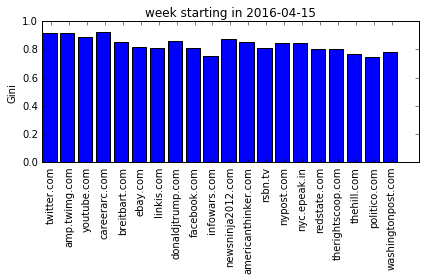

['twitter.com', 'youtube.com', 'amp.twimg.com', 'careerarc.com', 'facebook.com', 'breitbart.com', 'ebay.com', 'linkis.com', 'americanthinker.com', 'rsbn.tv', 'thegatewaypundit.com', 'donaldjtrump.com', 'politico.com', 'nyc.epeak.in', 'newsninja2012.com', 'infowars.com', 'thehill.com', 'rickwells.us', 'gingrichproductions.com', 'investors.com']
[50348, 16140, 10163, 7335, 7014, 6281, 3070, 2972, 2193, 2169, 1961, 1807, 1737, 1660, 1655, 1553, 1486, 1410, 1320, 1179]
['trump2016', 'trump', 'tcot', 'trumptrain', 'makeamericagreatagain', 'maga', 'isis', 'pjnet', 'cruzcrew', 'veterans', 'gop', '2a', 'cruz', 'job', 'tedcruz', 'inprimary', 'ccot', 'paprimary', 'hiring', 'islam']
[51058, 35467, 27751, 18531, 16787, 15068, 14626, 13434, 12510, 10805, 9625, 8272, 8234, 6958, 6403, 6367, 6038, 6023, 5709, 5507]


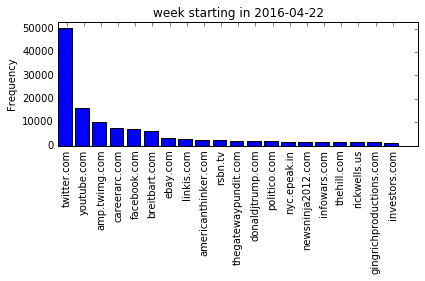

[0.9185020732178508, 0.9016499656019128, 0.876041103417397, 0.9255278950745367, 0.9189882290954267, 0.8683413915805557, 0.8204106972657413, 0.8165457256915631, 0.8753517725472518, 0.7784724227996782, 0.778414010403516, 0.8077321437727529, 0.8038577448554837, 0.845822016296533, 0.8541367009953398, 0.7377966588402223, 0.805594357998723, 0.9217809494260006, 0.7218260345520289, 0.8251597143930853]


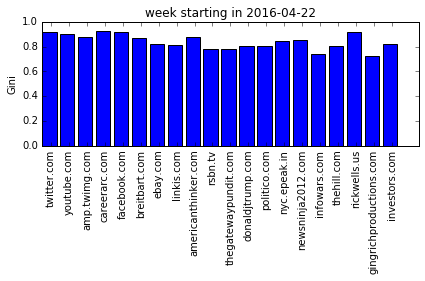

['twitter.com', 'youtube.com', 'amp.twimg.com', 'careerarc.com', 'breitbart.com', 'linkis.com', 'ebay.com', 'americanthinker.com', 'facebook.com', 'newsninja2012.com', 'rickwells.us', 'vine.co', 'thehill.com', 'rsbn.tv', 'infowars.com', 'donaldjtrump.com', 'nyc.epeak.in', 'foxnews.com', 'washingtonpost.com', 'politico.com']
[60742, 17022, 12149, 7312, 6338, 3171, 2963, 2309, 2301, 2055, 1957, 1925, 1712, 1698, 1625, 1610, 1573, 1531, 1417, 1354]
['trump2016', 'trump', 'tcot', 'trumptrain', 'maga', 'inprimary', 'pjnet', 'cruzcrew', 'makeamericagreatagain', 'isis', 'veterans', 'indiana', 'gop', 'indianaprimary', 'tedcruz', '2a', 'cruz', 'job', 'caprimary', 'islam']
[58382, 47523, 28577, 22520, 18846, 17817, 14408, 12806, 12114, 11757, 10694, 9329, 9145, 9013, 8028, 8017, 7346, 6873, 6343, 5857]


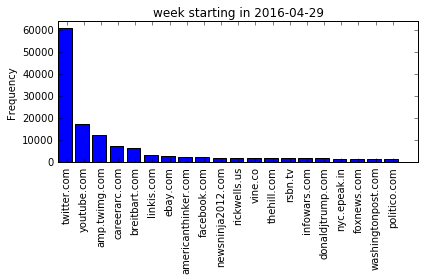

[0.9256381971279616, 0.896792591265474, 0.9049513219333172, 0.9246162729258316, 0.8800351210259576, 0.8298021940679459, 0.8229958818330105, 0.880197940343131, 0.7877235975378347, 0.8942188959482242, 0.8951113710581469, 0.846009606197357, 0.8012098523148247, 0.8044906998937645, 0.7683963303362473, 0.7992217719653711, 0.8423682616596002, 0.8038593381045579, 0.7916913779776544, 0.7954677973647207]


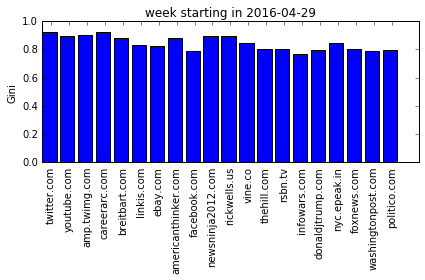

['twitter.com', 'youtube.com', 'amp.twimg.com', 'breitbart.com', 'careerarc.com', 'donaldjtrump.com', 'linkis.com', 'ebay.com', 'americanthinker.com', 'foxnews.com', 'trumprally.org', 'newsninja2012.com', 'rickwells.us', 'nyc.epeak.in', 'truthfeed.com', 'thehill.com', 'facebook.com', 'politico.com', 'cnn.com', 'dailycaller.com']
[49147, 13749, 10005, 7922, 6741, 4012, 3029, 2929, 2182, 1966, 1917, 1887, 1692, 1510, 1455, 1418, 1395, 1302, 1249, 1229]
['trump2016', 'trump', 'tcot', 'trumptrain', 'maga', 'pjnet', 'makeamericagreatagain', 'isis', 'veterans', 'islam', 'neverhillary', 'gop', '2a', 'job', 'cruzcrew', 'votetrump', 'ccot', 'nevertrump', 'hiring', 'wakeupamerica']
[51753, 42266, 28745, 23617, 17465, 14237, 12964, 10327, 9829, 8201, 7588, 7465, 7413, 6296, 5944, 5642, 5486, 5338, 5114, 4446]


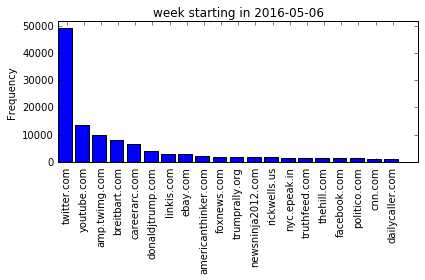

[0.9127947373195425, 0.8857226578123656, 0.8894926640642064, 0.899422721571626, 0.9201231386072725, 0.8894159313364487, 0.8359856124781498, 0.7952175841282757, 0.8688860592755214, 0.8355904181716894, 0.30297980134657687, 0.8824222567109272, 0.8398734757495186, 0.8438138611549016, 0.8258554259068719, 0.7817506319535011, 0.7339519187280381, 0.809171244327681, 0.7683397683397684, 0.7968580560977604]


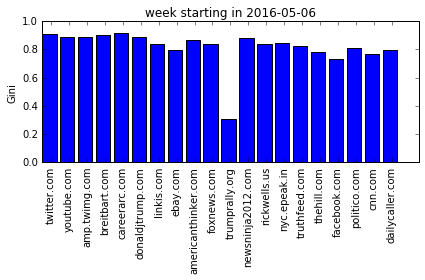

['twitter.com', 'youtube.com', 'amp.twimg.com', 'breitbart.com', 'careerarc.com', 'trumprally.org', 'linkis.com', 'ebay.com', 'foxnews.com', 'facebook.com', 'americanthinker.com', 'rickwells.us', 'nyc.epeak.in', 'cosaction.com', 'blogtalkradio.com', 'investors.com', 'statespoll.com', 'donaldjtrump.com', 'washingtonpost.com', 'thehill.com']
[39975, 12823, 7672, 7660, 6962, 3191, 3090, 2511, 2337, 2200, 2162, 2102, 1731, 1638, 1336, 1285, 1275, 1257, 1254, 1191]
['trump2016', 'trump', 'tcot', 'trumptrain', 'pjnet', 'maga', 'veterans', 'makeamericagreatagain', 'isis', '2a', 'gop', 'job', 'islam', 'neverhillary', 'hiring', 'cruzcrew', 'ccot', 'nevertrump', 'nra', 'istandwithmariam']
[43300, 33634, 28808, 21921, 16833, 14563, 12142, 11082, 10726, 7697, 6596, 6469, 6018, 5457, 5302, 5223, 5116, 4184, 4035, 3932]


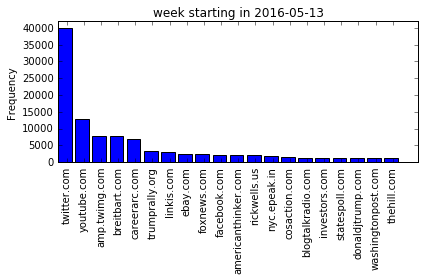

[0.9035967468415252, 0.8785257290978715, 0.8740304514937068, 0.8956787577343343, 0.9201054611974775, 0.40376175548589344, 0.845870336364463, 0.8082960133972887, 0.8291359140004886, 0.8338491617787761, 0.8508595595100785, 0.8839662447257384, 0.9146280007330034, 0.8854174609226076, 0.7131814649707579, 0.8283525935227958, 0.597639141117402, 0.7903719397363466, 0.7637373669767753, 0.7766170233275497]


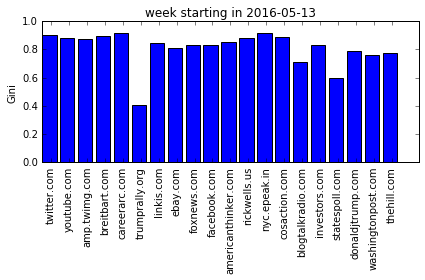

['twitter.com', 'youtube.com', 'amp.twimg.com', 'careerarc.com', 'breitbart.com', 'trumprally.org', 'reddit.com', 'linkis.com', 'cosaction.com', 'ebay.com', 'donaldjtrump.com', 'americanthinker.com', 'foxnews.com', 'vine.co', 'newsninja2012.com', 'nyc.epeak.in', 'msnbc.com', 'instagram.com', 'rickwells.us', 'rsbn.tv']
[39810, 11265, 7650, 7104, 6330, 4310, 3199, 3074, 2971, 2690, 2447, 2119, 1991, 1708, 1624, 1525, 1491, 1455, 1432, 1398]
['trump2016', 'trump', 'tcot', 'trumptrain', 'maga', 'pjnet', 'veterans', '2a', 'isis', 'makeamericagreatagain', 'islam', 'gop', 'job', 'nra', 'neverhillary', 'hiring', 'ccot', 'cosproject', 'istandwithmariam', 'wakeupamerica']
[46893, 32891, 28418, 25366, 18572, 15933, 14101, 12558, 12501, 8873, 6948, 6664, 6605, 6195, 5528, 5388, 5031, 4027, 3932, 3641]


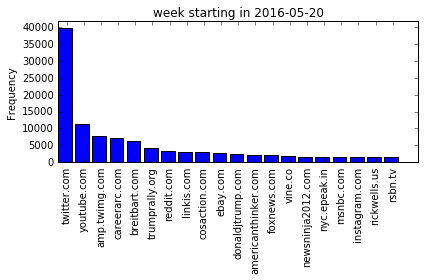

[0.9048252653827034, 0.8694349205248474, 0.8358218186937587, 0.9212180818826018, 0.8865455527132996, 0.46695188492063494, 0.9372724256357, 0.8225600610293482, 0.9302922309337135, 0.8366373070126407, 0.8624682795165302, 0.8491454207894502, 0.8483688709502065, 0.8412682167255767, 0.8780505284078965, 0.8209798108146266, 0.9151065161554899, 0.7043114010040672, 0.8951566607245369, 0.7812401822180333]


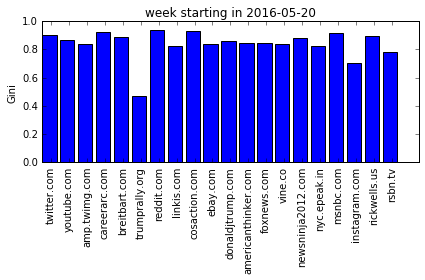

['twitter.com', 'youtube.com', 'careerarc.com', 'amp.twimg.com', 'breitbart.com', 'donaldjtrump.com', 'reddit.com', 'trumprally.org', 'linkis.com', 'ebay.com', 'entertravels.com', 'americanthinker.com', 'nyc.epeak.in', 'rickwells.us', 'instagram.com', 'foxnews.com', 'dailymail.co.uk', 'blogtalkradio.com', 'investors.com', 'statespoll.com']
[32651, 11318, 7004, 6205, 5690, 3701, 3444, 3226, 3034, 2573, 2399, 1908, 1610, 1454, 1451, 1386, 1379, 1281, 1158, 1100]
['trump2016', 'trump', 'tcot', 'trumptrain', 'maga', 'veterans', 'isis', 'pjnet', 'makeamericagreatagain', '2a', 'job', 'islam', 'gop', 'hiring', 'realdonaldtrump', 'nra', 'ccot', 'neverhillary', 'istandwithmariam', 'jobs']
[41817, 31112, 26227, 17999, 16779, 14321, 13194, 12622, 10016, 7938, 6526, 6487, 5458, 5350, 4767, 4513, 4350, 3985, 3932, 3590]


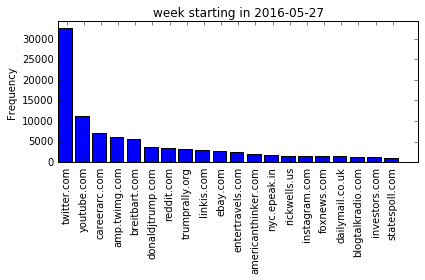

[0.8876003191047789, 0.8667040432064734, 0.9210760578947018, 0.8411776332862024, 0.8736648507504627, 0.9262424006651563, 0.9320685579196217, 0.5365859968180466, 0.7950059938380091, 0.7999660414657959, 0.4603091628705847, 0.8556618972463915, 0.8368423916000217, 0.8914522561977007, 0.7415785244806758, 0.8150208910768213, 0.792663958424828, 0.7738420855511797, 0.8478384185646756, 0.576510522742702]


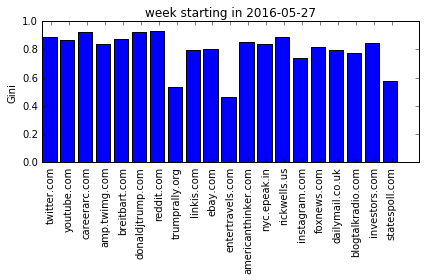

['twitter.com', 'youtube.com', 'careerarc.com', 'amp.twimg.com', 'breitbart.com', 'facebook.com', 'reddit.com', 'trumprally.org', 'linkis.com', 'ebay.com', 'donaldjtrump.com', 'americanthinker.com', 'rickwells.us', 'nyc.epeak.in', 'blogtalkradio.com', 'foxnews.com', 'newsninja2012.com', 'JAVGOG.COM', 'instagram.com', 'thegatewaypundit.com']
[39984, 12514, 8507, 7915, 7008, 3671, 3455, 3395, 3136, 2566, 2205, 2132, 1800, 1573, 1546, 1533, 1518, 1503, 1433, 1375]
['trump2016', 'trump', 'tcot', 'trumptrain', 'maga', 'pjnet', 'veterans', 'isis', 'makeamericagreatagain', '2a', 'job', 'islam', 'gop', 'hiring', 'neverhillary', 'ccot', 'realdonaldtrump', 'jobs', 'nra', 'istandwithmariam']
[49477, 35526, 29904, 20637, 20355, 14296, 13695, 12984, 10868, 8155, 8073, 7874, 7756, 6798, 5114, 5080, 4572, 4253, 4118, 3932]


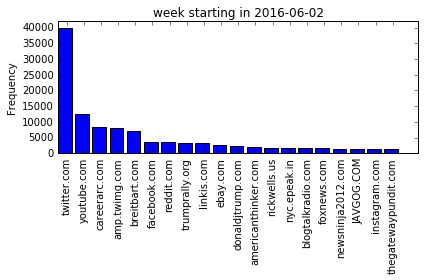

[0.897277928973088, 0.876076924748447, 0.9216823962935232, 0.8576449607421766, 0.8889215333208732, 0.8323010893413911, 0.9329113590904305, 0.26182432432432434, 0.8045874350194399, 0.8083310987733192, 0.8564933044795203, 0.8450681540957592, 0.9163917514085864, 0.8660271782573941, 0.8435580788625084, 0.8389672675065991, 0.7956346546598642, 0.16883731218839865, 0.7115684051477538, 0.8302690016628428]


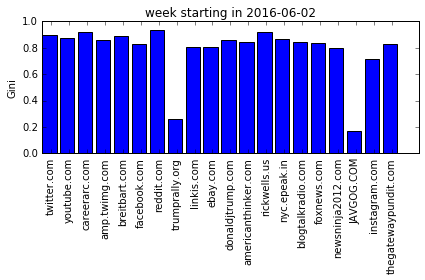

['twitter.com', 'youtube.com', 'breitbart.com', 'careerarc.com', 'amp.twimg.com', 'donaldjtrump.com', 'linkis.com', 'truthfeed.com', 'trumprally.org', 'ebay.com', 'americanthinker.com', 'facebook.com', 'JAVGOG.COM', 'newsninja2012.com', 'foxnews.com', 'rickwells.us', 'washingtonpost.com', 'thegatewaypundit.com', 'nyc.epeak.in', 'dailymail.co.uk']
[44220, 12150, 8876, 6793, 6656, 4517, 3447, 3282, 2969, 2586, 2352, 2015, 1913, 1824, 1819, 1788, 1732, 1726, 1576, 1521]
['trump2016', 'trump', 'tcot', 'maga', 'trumptrain', 'isis', 'pjnet', '2a', 'veterans', 'islam', 'makeamericagreatagain', 'orlando', 'gop', 'nra', 'job', 'ccot', 'hiring', 'wakeupamerica', 'neverhillary', 'realdonaldtrump']
[47472, 34440, 31414, 24603, 18014, 17483, 14259, 13580, 11452, 10492, 8860, 8776, 7736, 7571, 6364, 5147, 5035, 4603, 4561, 4133]


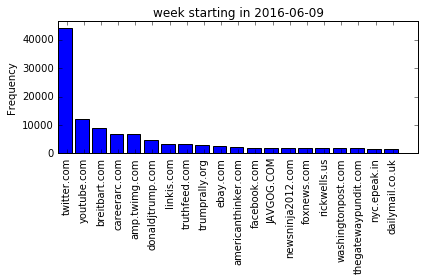

[0.8954017841458686, 0.8697258194253272, 0.8998781737712556, 0.9194748518910749, 0.8726647406795983, 0.9192342111991818, 0.8068567671222467, 0.8950335769948822, 0.5280581203922411, 0.8009690128308223, 0.8580750674923412, 0.772322673289507, 0.17302171266505237, 0.7838861554764969, 0.8077699122341135, 0.887915352898375, 0.8089400883941725, 0.834468655935087, 0.8822229076701624, 0.8132454087668152]


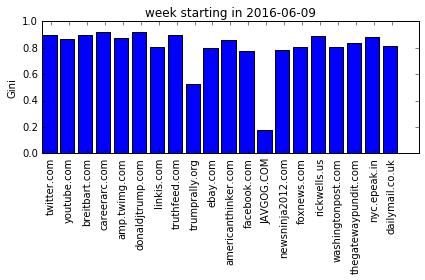

['twitter.com', 'youtube.com', 'amp.twimg.com', 'breitbart.com', 'reverbnation.com', 'careerarc.com', 'soundcloud.com', 'facebook.com', 'linkis.com', 'ebay.com', 'americanthinker.com', 'rickwells.us', 'donaldjtrump.com', 'foxnews.com', 'trumprally.org', 'newsninja2012.com', 'instagram.com', 'amazon.com', 'blogtalkradio.com', 'nyc.epeak.in']
[37941, 12259, 10518, 9887, 9083, 7327, 5358, 3861, 3665, 2641, 2583, 2576, 2427, 2407, 1665, 1653, 1650, 1642, 1340, 1331]
['trump2016', 'tcot', 'trump', 'trumptrain', 'maga', '2a', 'isis', 'pjnet', 'veterans', 'nra', 'islam', 'makeamericagreatagain', 'americafirst', 'wakeupamerica', 'job', 'gop', 'ccot', 'hiring', 'orlando', 'soundcloud']
[61259, 31620, 30991, 25759, 23150, 19570, 17539, 15388, 12156, 9918, 9413, 7674, 7092, 6867, 6826, 6526, 5747, 5524, 5491, 5204]


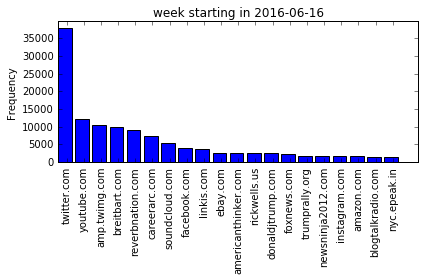

[0.8904839557810607, 0.8591489621735068, 0.870922397758772, 0.9032942026172291, 0.8176615944856288, 0.9208501354965408, 0.9533434117467633, 0.859671057345476, 0.8088512531146453, 0.7957469926748407, 0.8744874945056529, 0.8647400745777583, 0.9196366919849153, 0.8483832623150834, 0.3321321321321321, 0.8146710671067107, 0.7596416215618764, 0.9051320573954319, 0.855063025210084, 0.8437322974832079]


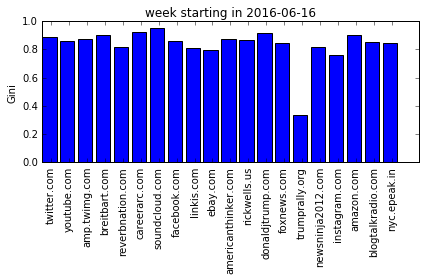

['twitter.com', 'reverbnation.com', 'youtube.com', 'soundcloud.com', 'breitbart.com', 'amp.twimg.com', 'careerarc.com', 'linkis.com', 'americanthinker.com', 'foxnews.com', 'ebay.com', 'politico.com', 'rickwells.us', 'vine.co', 'newsninja2012.com', 'trumprally.org', 'donaldjtrump.com', 'blogtalkradio.com', 'statespoll.com', 'investors.com']
[34262, 11119, 9592, 9359, 9159, 6247, 5950, 2890, 2318, 2269, 2034, 1787, 1691, 1641, 1502, 1381, 1331, 1306, 1251, 1229]
['trump2016', 'trumptrain', 'trump', 'tcot', 'maga', 'benghazi', 'pjnet', '2a', 'isis', 'veterans', 'soundcloud', 'brexit', 'makeamericagreatagain', 'nra', 'islam', 'job', 'imwithyou', 'gop', 'wakeupamerica', 'np']
[54984, 26860, 24449, 24412, 20368, 15640, 12695, 10981, 10692, 10046, 8758, 8327, 6488, 5783, 5764, 5575, 5501, 5088, 4698, 4613]


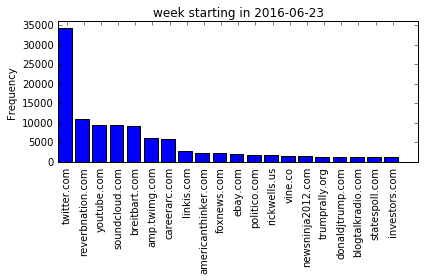

[0.893142645392123, 0.8566066692780407, 0.8578945086690363, 0.9615677776244482, 0.9034319249143073, 0.85055000029165, 0.916522764245203, 0.7797910203919415, 0.8882703117456376, 0.8339450234511196, 0.787815880873488, 0.8734456635318705, 0.7780319024161388, 0.8199327369807919, 0.8125867817565954, 0.7457550578034682, 0.8644405833985904, 0.7822806161850181, 0.6401034783342238, 0.8513250405624662]


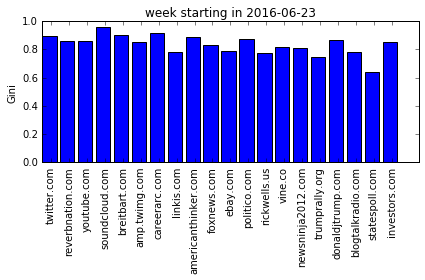

In [6]:

date_list = np.load('date_list' + '.npy')
print date_list

#We open up the relevant data on a week-by-week basis
for date in date_list:
    #the .item() is important to making these into dictionaries I guess
    url_dictionary = np.load('urlFreq' + output_name + date + '.npy').item()
    urls_and_tags = np.load('urlTags' + output_name + date + '.npy').item()
    total_hashtag_count_dictionary = np.load('HashFreq' + output_name + date + '.npy').item()


    #now, we want to find the top 20 urls in this week 
    #sorted takes a list, and returns a sorted list according to the 'key'
    # .items() on a dictionary converts a dictionary to a list of pairs, with 
    # entries like (key, value), and lambda t: t[1] says to look at the second entry
    # so the below two lines returns a list of the urls in descending order of frequency
    sorted_url_list = sorted(url_dictionary.items(), key = lambda t: t[1], reverse = True)
    sorted_url_list = map(lambda t: t[0], sorted_url_list)
    sorted_hashtag_list = sorted(total_hashtag_count_dictionary.items(), key = lambda t: t[1], reverse = True)
    sorted_hashtag_list = map(lambda t: t[0], sorted_hashtag_list)
    
    top_twenty_url = sorted_url_list[:20] #list of the top twenty urls this week
    top_twenty_url_count = [] #the url's corresponding frequencies this week
    for url in top_twenty_url:
        top_twenty_url_count.append(url_dictionary[url])
        
    top_twenty_hashtags = sorted_hashtag_list[:20] #Just added
    top_twenty_hashtags_count = [] #the hashtags's corresponding frequencies this week
    for Indiv_hashtag in top_twenty_hashtags:
        top_twenty_hashtags_count.append(total_hashtag_count_dictionary[Indiv_hashtag])

    print top_twenty_url
    print top_twenty_url_count
    print top_twenty_hashtags
    print top_twenty_hashtags_count



    #DARK PYPLOT MAGIC OOOOOOHHHHHH            
    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 


    ax.bar(range(20), top_twenty_url_count)
    ax.axis([0, 21, 0, max(top_twenty_url_count)*1.05]) #[min x, max x, min y, max y]


    ax.set_xticks(np.array(range(20))+0.5) #put where the tick-marks
    ax.set_xticklabels(top_twenty_url, fontsize = 10) #what to label the ticks
#             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
#             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('week starting in ' + date,  fontsize = 12)
#             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Frequency', fontsize = 10)  
#             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('urls' + output_name + date + '.png')    
    plt.show()
    plt.close()    





    Gini_List = []

    #now plotting Gini Index for each of the top twenty
    for url in top_twenty_url:

        single_url_tags = urls_and_tags[url] #dictionary of {tag:#}
        Gini = getGini(single_url_tags)
#                 tags_list = single_url_tags.keys() #list of [tag]
#                 #I _think_ this should be equivalent to single_
#                 tags_freq_list = [single_url_tags[tag] for tag in tags_list]


#                 denominator = 2*len(tags_list) * sum(tags_freq_list)
#                 numerator = 0
#                 for freq1 in tags_freq_list:
#                     for freq2 in tags_freq_list:
#                         numerator += abs(freq1 - freq2)

#                 Gini = float(numerator)/denominator
        Gini_List.append(Gini)


    print Gini_List

    #DARK PYPLOT MAGIC OOOOOOHHHHHH            
    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 


    ax.bar(range(20), Gini_List)
    ax.axis([0, 21, 0, 1.0]) #[min x, max x, min y, max y]


    ax.set_xticks(np.array(range(20))+0.5) #put where the tick-marks
    ax.set_xticklabels(top_twenty_url, fontsize = 10) #what to label the ticks
#             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
#             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('week starting in ' + date,  fontsize = 12)
#             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini', fontsize = 10)  
#             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('Gini' + output_name + date + '.png')    
    plt.show()
    plt.close()   




week starting in 2015-03-06 complete.
week starting in 2015-03-13 complete.
week starting in 2015-03-20 complete.
week starting in 2015-03-27 complete.
week starting in 2015-04-03 complete.
week starting in 2015-04-10 complete.
week starting in 2015-04-17 complete.
week starting in 2015-04-24 complete.
week starting in 2015-05-01 complete.
week starting in 2015-05-08 complete.
week starting in 2015-05-15 complete.
week starting in 2015-05-22 complete.
week starting in 2015-05-29 complete.
week starting in 2015-06-05 complete.
week starting in 2015-06-12 complete.
week starting in 2015-06-19 complete.
week starting in 2015-06-26 complete.
week starting in 2015-07-03 complete.
week starting in 2015-07-10 complete.
week starting in 2015-07-17 complete.
week starting in 2015-07-24 complete.
week starting in 2015-07-31 complete.
week starting in 2015-08-07 complete.
week starting in 2015-08-14 complete.
week starting in 2015-08-21 complete.
week starting in 2015-08-28 complete.
week startin

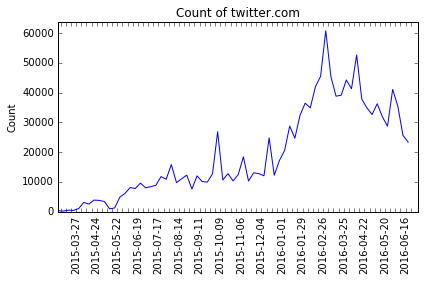

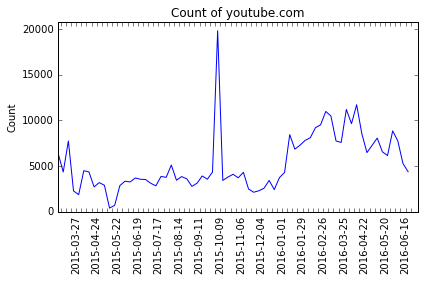

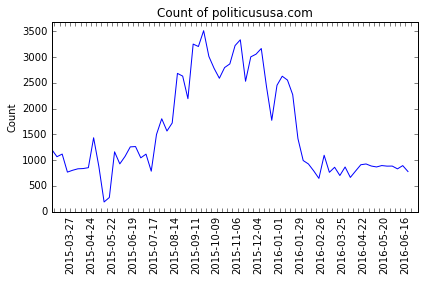

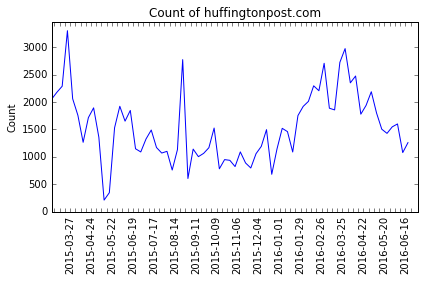

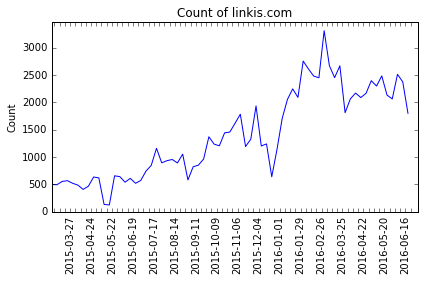

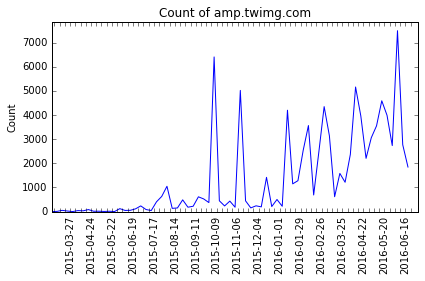

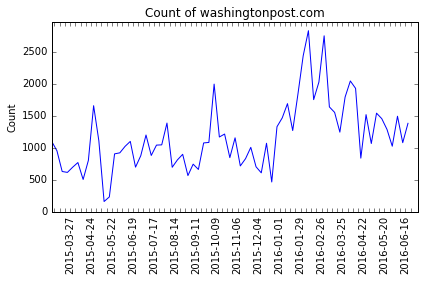

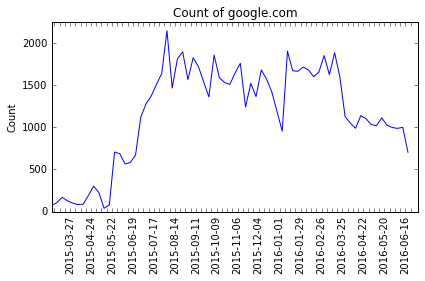

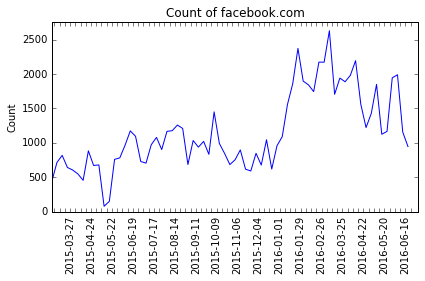

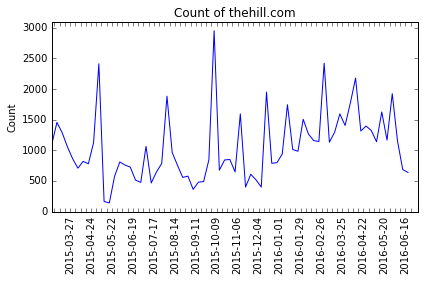

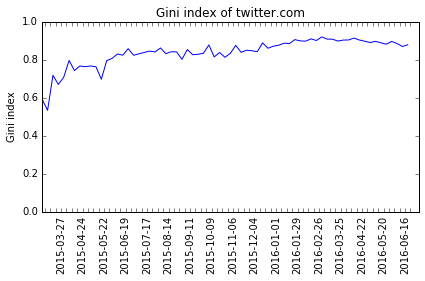

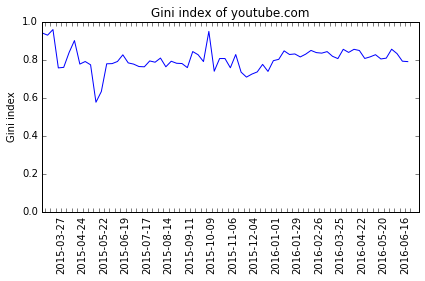

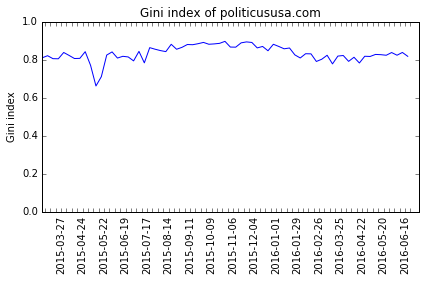

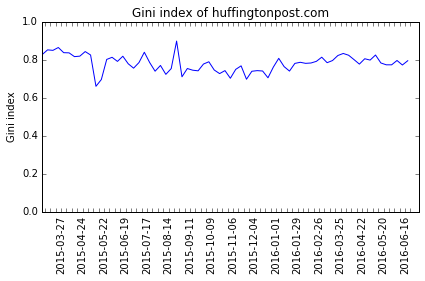

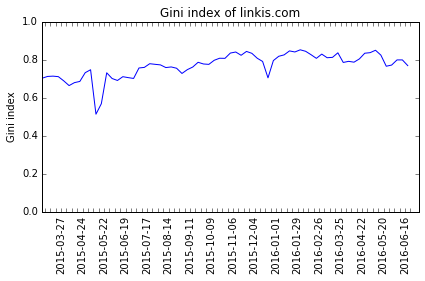

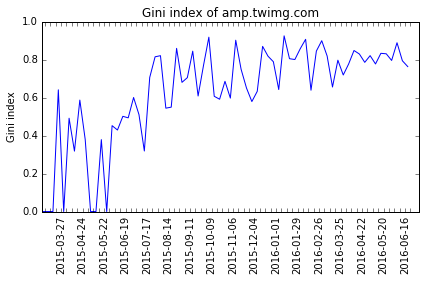

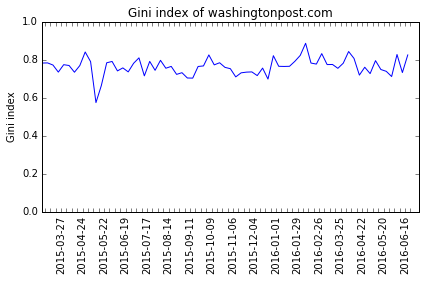

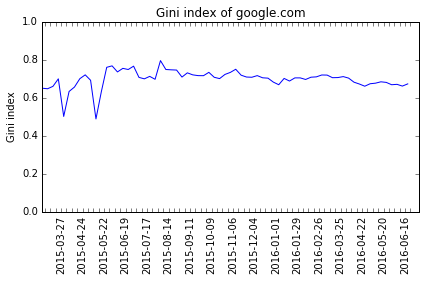

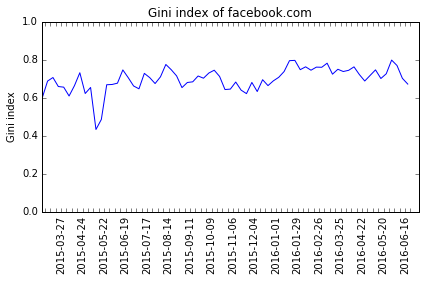

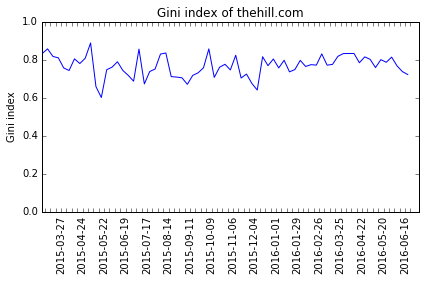

In [6]:
date_list = np.load('date_list' + '.npy')
total_url_dictionary = np.load('urlFreq' + output_name + 'Total' + '.npy').item()


#start by choosing the top urls from the previous
#use the same tricks as last time to get the sorted list of top urls
total_sorted_url_list = sorted(total_url_dictionary.items(), key = lambda t: t[1], reverse = True)
total_sorted_url_list = map(lambda t: t[0], total_sorted_url_list)


numb_urls = 10 # we just choose how many we want over here
top_urls = total_sorted_url_list[:numb_urls] #list of the top used urls over all time


#this makes a dictionary with {url:[]}.  The empty list will get filled up
#with the week-by-week frequencies of the url
top_urls_freq = dict([(url,[]) for url in top_urls])

#same as above, except now it'll be the week-by-week Gini indexes
top_urls_gini = dict([(url,[]) for url in top_urls])


for date in date_list:
    
    #opening this week's relevant information
    url_dictionary = np.load('urlFreq' + output_name + date + '.npy').item()
    urls_and_tags = np.load('urlTags' + output_name + date + '.npy').item()                    

    #for a single week:                    
    # url_dictionary lists how often each url shows up
    # urls_and_tags contains the tag frequency for each url
    
    #So here we just add the weekly values of the things we care about
    #to the right data-structure-things for the top urls
    
    for url in top_urls:
        #check if it shows up this week
        if url in url_dictionary.keys():
            #getting the current lists
            freq_list = top_urls_freq[url] 
            gini_list = top_urls_gini[url] 

            #getting this week's data
            freq = url_dictionary[url]
            Gini = getGini(urls_and_tags[url])

            #appending and storing lists
            freq_list = freq_list + [freq]
            gini_list = gini_list + [Gini]

            top_urls_freq[url] = freq_list
            top_urls_gini[url] = gini_list
        #if it doesn't show up, add zeros
        else:
            #getting the current lists
            freq_list = top_urls_freq[url] 
            gini_list = top_urls_gini[url] 

            #it didn't show up, so doesn't count
            freq = 0
            Gini = 0

            #appending and storing lists
            freq_list = freq_list + [freq]
            gini_list = gini_list + [Gini]

            top_urls_freq[url] = freq_list
            top_urls_gini[url] = gini_list


    print "week starting in " + date + " complete."

            

                      
#We have cycled through all the weeks, so time to plot all the vectors

numDates = len(date_list)

#silly thing to help figure labeling later
date_labels = []
counter = 1
for date in date_list:
    if counter % 4 == 0:
        date_labels.append(date)
    else:
        date_labels.append('')
    counter += 1 
        
        

#top_urls_freq 

for url in top_urls:
    single_url_freqs = top_urls_freq[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving


    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_freqs)
    ax.axis([0, numDates + 1, 0, 1.05*max(single_url_freqs)]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Count of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Count', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullFreq' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  






#top_urls_gini

for url in top_urls:
    single_url_gini = top_urls_gini[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_gini)
    ax.axis([0, numDates + 1, 0, 1]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Gini index of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini index', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullGini' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  


    

    


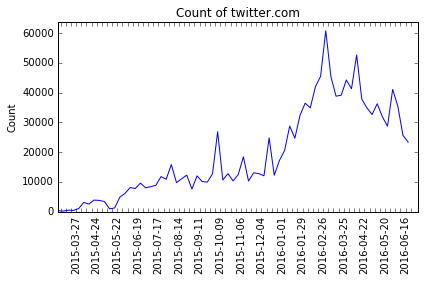

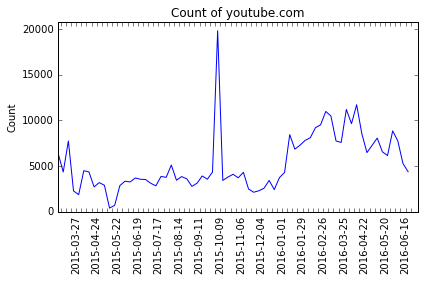

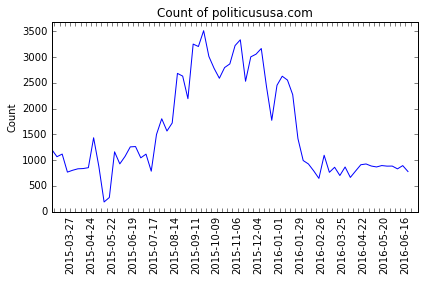

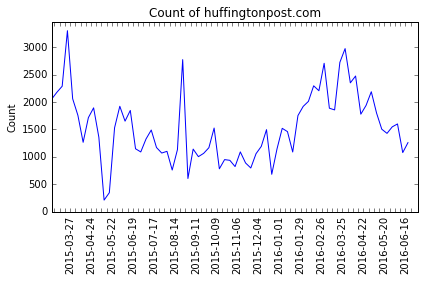

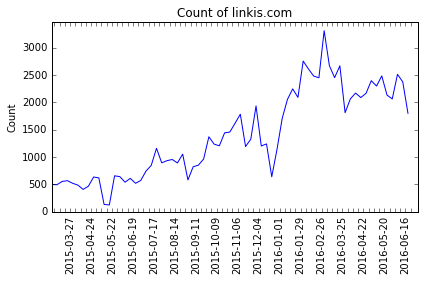

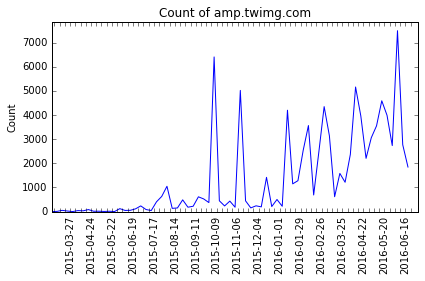

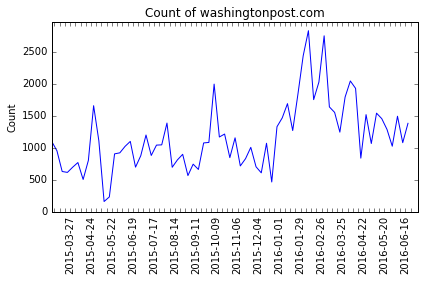

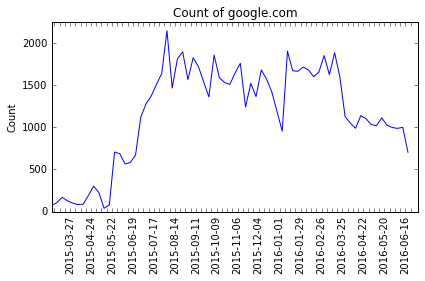

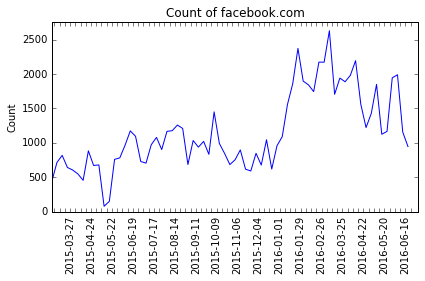

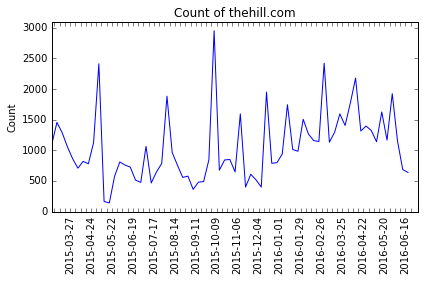

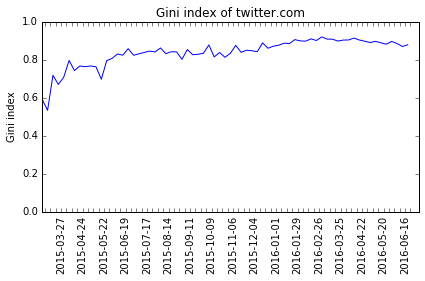

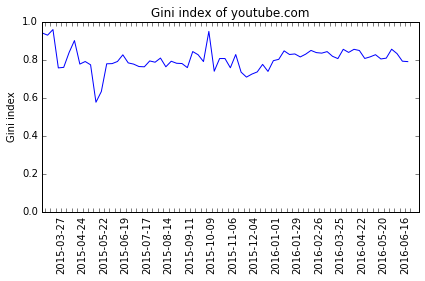

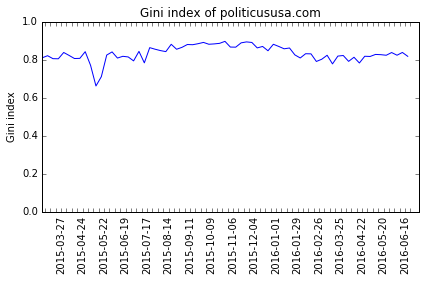

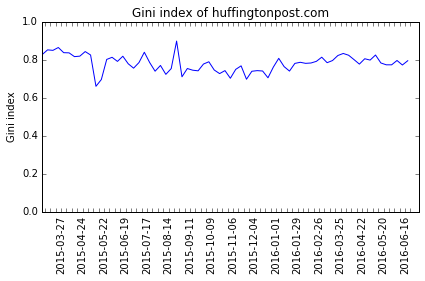

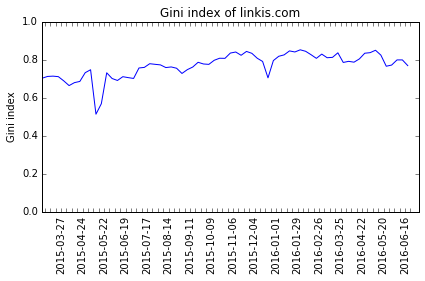

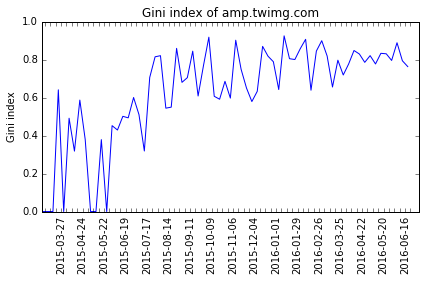

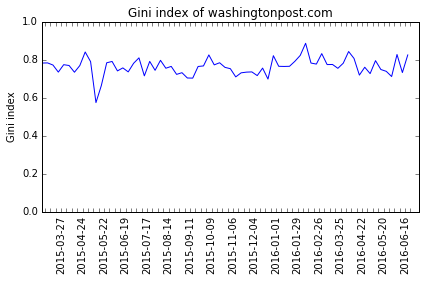

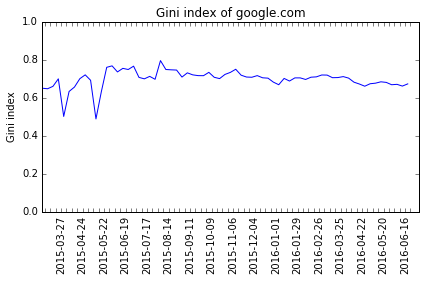

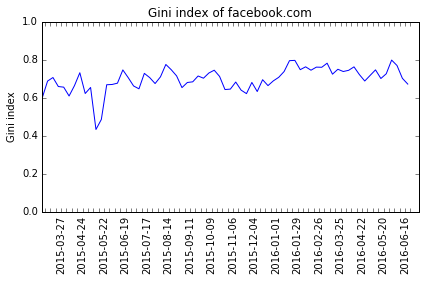

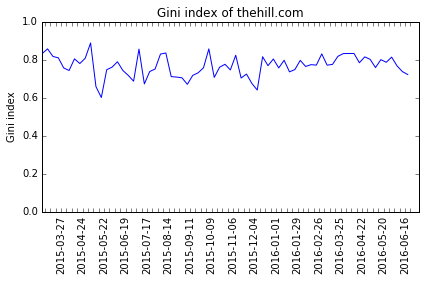

In [6]:
#silly thing to help figure labeling later
date_labels = []
counter = 1
for date in date_list:
    if counter % 4 == 0:
        date_labels.append(date)
    else:
        date_labels.append('')
    counter += 1 
        
        

#top_urls_freq 

for url in top_urls:
    single_url_freqs = top_urls_freq[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_freqs)
    ax.axis([0, numDates + 1, 0, 1.05*max(single_url_freqs)]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Count of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Count', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullFreq' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  






#top_urls_gini

for url in top_urls:
    single_url_gini = top_urls_gini[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving    

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_gini)
    ax.axis([0, numDates + 1, 0, 1]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Gini index of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini index', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullGini' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  


In [10]:
hashtags_co_occur = {}

for tweet in all_tweets: # going across all tweets
    for tag1 in tweet:     
        if tag1 in Ads_tags_list: #checking if any of the tags are ad-tags
            for tag2 in tweet:   # if one of the tags _was_ an add-tag, we go back and add all the tags on this tweet
                if tag2 not in Ads_tags_list: # we exclude all ad-tags themselves
                    if tag2 in hashtags_co_occur.keys(): # adding in the tags that appear next to the add
                          hashtags_co_occur[tag2] += 1
                    else: 
                          hashtags_co_occur[tag2] = 1

#This _should_ return a dictionary where the keys are tags that appear next to ad-tags, and the values are the number of times they appear.  This might have weird implications if multiple ad-tags appear in the same tweet, but it isn't clear to me how you'd want to handle that.  If you want it in the list format, then you just need 

list_co_occur = hashtags_co_occur.items()

print hashtags_co_occur.keys()

[]


In [11]:
print all_tweets

[['transgender', 'lgbt', 'noh8'], ['stoprush', 'tcot'], ['stoprush', 'tcot'], ['hillary2016'], ['hillary2016'], ['tcot', 'tlot', 'ocra', 'gop', 'teaparty', 'p2', 'sgp'], ['tcot', 'tlot', 'ocra', 'gop', 'teaparty', 'p2', 'sgp'], ['nafta', 'trade', 'tpp', 'isds'], ['occupy'], ['tpp', 'stoptpp'], ['hillary'], ['hillary'], ['government', 'watchdogs', 'dems', 'hillaryemail'], ['government', 'watchdogs', 'dems', 'hillaryemail'], ['wiunion'], ['hillary2016'], ['hillary2016'], ['benghazi', 'hillary', 'pantsuits', 'luciferiscoming'], ['hillary'], ['hillary'], ['hillary', 'seizetheservers'], ['hillary', 'seizetheservers'], ['blacklivesmatter'], ['tcot', 'benghazi', 'p2'], ['tcot', 'benghazi', 'p2'], ['hillary', 'israel'], ['hillary', 'israel'], ['antique', 'union', 'civil', 'war', 'sword', 'buynow', 'deal', 'ebay'], ['tntweeters', 'immigrationaction', 'latism', 'uniteblue'], ['tntweeters', 'immigrationaction', 'latism', 'uniteblue'], ['benghazi', 'p2', 'tcot'], ['benghazi', 'p2', 'tcot'], ['wiun

In [10]:
sorted_data_df = data_df.sort_values(by="URL Frequency", ascending=False)
sd = sorted_data_df.head(20)
sd


NameError: name 'data_df' is not defined

### Getting the row(s) where columns match a given condition

**Condition** is `column == some_value`. This is calculated from a boolean series

To then get the dataframe row(s) we do: `Dataframe[ boolean series ]`

In [7]:
thehill = sorted_data_df[ sorted_data_df["URL"] == "http://thehill.com/" ]
#   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ -> boolean series giving all rows where URL column is TheHill

thehill

NameError: name 'sorted_data_df' is not defined

In [ ]:
thehill_series = thehill["Associated Hashtags"].iloc[0]
#                                              ^^^^^ with iloc you can get rows using 0-indexed entries

thehill_series[thehill_series > 10].plot(kind="bar", figsize=(15, 8))

plt.xticks(rotation=70)

In [ ]:
#to read Currently undone, but needed for graphing
#df=pd.read.csv("File Name.csv",index_col=0)
#df

data_df.to_csv("URL_Hashtag_link_.csv")

In [ ]:
#produce a graph
# pd.DataFrame(data_df(INSERT URL CHOICE HERE), index=ts.index - this should be the hashtags, columns = Date)
#DataFrame.plot.bar(stacked=True)

#data_df.plot()

test_df=pd.read_csv("URL_Hashtag_link_.csv",index_col=0)
test_df.head()

In [ ]:
#plt.figure(kind='bar'); 
sd.plot.bar(); 
